# 회귀분석

Last updated 202111_20201112_20191213FRI1110

## S.1 목차

* S.2 문제의 이해
* S.3 회귀식
* S.3.1 모델
* S.3.2 입력변수의 수에 따른 구분
* S.3.3 정규화 회귀모형
* S.3.4 표준화에 따른 구분
* S.4 OLS
* S.4.1 데이터
* S.4.2 그래프
* S.4.3 선형 회귀식 풀기
* S.4.4 Python으로 미분해서 풀어보자
* S.4.5 R2 (--> s.6 gradient 뒤로 이동)
* S.5 matrix inverse method
* S.5.1 풀기
* S.5.2 데이터
* S.5.3 identity matrix
* S.5.4 $\beta$
* 문제: Matrix Inverse Method 회귀모델
* 문제: 온도의 회귀식, 그래프
* S.6 gradient for linear regression
* 문제: 키 몸무게를 matrix inverse method와 gradient descent로 풀기
* S.7 정규화 회귀모형 (--> s.3.5로 이동)
* 문제: 전복 나이의 예측: sklearn, spark 회귀분석
* S.8 Local Regression
* S.9 Ridge
* S.10 Lasso
* S.11 forward stagewise
* S.11 비선형 모델
* 문제: iris데이터를 numpy, statsmodels, sklearn, Pyspark로 회귀분석
* 문제: Pyspark로 매출 회귀분석 및 평가
* 문제: 주택가격의 sklearn (Lasso, Ridge), Pyspark로 회귀분석
* 문제: statsmodel, pyspark로 당뇨의 회귀분석 및 평가

* 참조 ISLR 6장

## S.2 문제의 이해

어떤 값을 예측한다고 하고, 그 값에 영향을 미치는 변수들이 있다고 하자.
예측 값을 **종속변수 Dependent variables** 또는 **출력변수 Output variables**라고 하고,
영향변수를 **독립변수 Input variables**라고 하거나 **입력변수 Input variables**라고 한다.
예를 들어, 영화매출을 예측한다고 하자. 매출에 영향을 미칠 수 있는 변수로 평점, 광고비, 투자비, 개봉일 매출액, 조회수 등을 꼽을 수 있다.
회귀분석은 입력변수로부터 목표 값을 예측을 하는 문제에 사용한다.

## S.3 회귀식

### S.3.1 모델

$y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n
 = \beta_0 + \sum_{j=1}^n \beta_j x_j$

* $x \in \mathbb{R}^{m}_{n}$는 입력변수이고 i개 레코드, j개 속성으로 이루어진 입력데이터
* $y$ 는 목표변수로서 1개의 컬럼 값을 가진다.
    $$\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

위 식은 $x_0=1$인 경우 $y = \sum_{j=0}^n \beta_j x_j$

#### 벡터 표기

데이터 x는 벡터로 표현할 수 있으며, $x^{m}_{n}$는 m개의 데이터 갯수, n개의 속성으로 구성된 벡터이다.
$x_{ij}$는 **i**번째 샘플(행)의 **j**번째 속성(열)이다.
또는 위첨자 superscript, 아래첨자 subscript를 이용하여 표기하기도 한다. $x^{(j)}_i$ 영어로 설명하면 이해하기 쉽다. 즉 위첨자 **Up**per는 알파벳 **U**로 시작하니 위에서 아래로 (**up**에서 down), 반면에 아래첨자 **L**ower는 왼쪽에서 오른쪽으로 (**l**eft to right) 구성된다 (Einstein 표기법이라 한다).
* 즉, 위첨자 superscript (j)는 j번째 **열**
* 아래첨자 subscript (i)는 i번째 **행**을 의미한다.


#### argmin

$\beta$를 w로 표기하기도 하는데, 그러면 회귀식은 y=wx으로 바꿔쓸 수 있다.
회귀식은 아래에서 보듯이 $\hat{w}$를 찾아야 풀리게 된다.
$argmin_{w}$은 오류 $(y-wx)^2$를 최소화하는 w를 의미한다.

$\hat{w} = argmin_{w} (y-wx)^2$



### S.3.2 입력변수의 수에 따른 구분

회귀식은 **입력변수에 대해 영향을 미치는 가중치를 주어 출력변수 값을 계산하는 식**이라고 할 수 있다.
출력변수는 숫자이고 입력변수는 하나 이상이 될 수 있다.

상관관계와 회귀분석은 여러 변수간의 관계를 분석하는 방법이란 공통점이 있다.
반면에 **상관관계**는 변수 간 관계의 강도를 -1 ~ 1 값으로 측정하는 것이고, **회귀분석**에서는 종속변수와 독립변수를 구분하여 설명하거나, 예측하는데 쓰인다.

입력변수에 따라 이진, 다중회귀분석으로 구분할 수 있다.
**이진회귀식 binary regression**은 두 변인 간의 관계를 나타내는 경우에 쓰인다.
**다중회귀식 multiple regression**은 변인이 복수인 경우를 말한다.

### S.3.3 정규화 회귀모형

정규화 regularization는 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화 overfitting 되는 현상을 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다. OLS weights를 줄이는 방식 (0까지 줄이면 속성 제거 효과). 일반적으로 다음과 같은 세가지 방법이 사용된다. 

* **Ridge** 오류함수에 가중치의 제곱합, 즉 L2를 최소화하는 제약조건을 추가한다. L1과 마찬가지로 가중치가 너무 크지 않은 방향으로 학습하게 된다.
    * $\lambda=0$이면 variance증가, bias=0
    * $\lambda$가 증가하면 variance감소, bias증가
* **Lasso** 오류함수에 가중치의 절대값, 즉 L1을 더해준다.
L2와 마찬가지로 가중치가 너무 크지 않은 방향으로 학습되게 한다.
* **Elastic Net** L1 + L2, 즉 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.


#### bias와 variance

**variance**는 회귀식을 기준으로 퍼져 있는 정도를 의미한다. 통계에서 말하는 분산으로, 오류가 넓게 퍼져 분포될 수록 variance는 크다.
반면에 **bias**는 회귀식이 평균적으로 벗어난 정도를 의미한다. 화살이 과녁에 도착하였지만, 여기 저기 퍼져 있는 것이 아니라 잘 모아져 있지만 실제 값에서 벗어난 정도를 말한다. bias가 크고 variance가 적으면 평균만 이동해주면 잘 맞게 된다.
* $E[(y - \hat{y})^2] = Bias^2 + Var (\sigma^2)$
* $Bias = E[\hat{y}] - y$ 기대예측값과 실제값의 차이
* $Var = E[(\hat{y} - E[\hat{y}])^2]$

모델의 정확성을 높일수록, bias는 감소, variance는 증가한다.
변수가 증가할수록 **overfitting**의 위험이 발생할 수 있다.
**overfit**은 bias는 낮고 variance가 높은 경우, 반대로 **underfit**은 bias는 높고 variance가 낮은 경우를 말한다.
예를 들어 변수의 갯수(p)가 데이터 수(n) 보다 많아지게 되면, variance가 무한대로 증가한다.
이럴 경우, **shrinkage** 방식으로 모델의 variance를 줄이고, 정확성을 높일 수 있다.

모든 변수를 넣어서 모델을 만들 수 있지만, 그 보다는 **변수를 추가하면서 그 조합에서 RSS, Residual Sum of Squares가 가장 적은 모델을 선택**하게 된다.
속성이 10개라면 1024개 모델, $2^{10}$의 조합이 가능하다. 속성이 40개 이상이면 $2^{40}$, 계산이 거의 불가능하다.

또는 변수를 하나씩 추가하면서 **stepwise**, 또는 순서를 정하지만, 먼저 넣어야할 변수와 아닌 경우로 계층화해서 (고기류는 먼저 넣고, 야채는 나중에) **hierachical** 방식으로 할 수 있다.
* forward selection: 후보변수 없이 null model에서 시작하여, 하나씩 후보변수를 추가 
* backward selection: 모든 후보변수를 넣고 full model에서 시작하고, 하나씩 제거

변수를 선택하는 기법으로 PCA (Principle Component Analysis)를 사용할 수 있다.

### S.3.4 표준화에 따른 구분

비표준화된 회귀식 unstandardized regression equation은 원래 데이터를 그대로 사용하기 때문에 직관적으로 이해할 수 있다.

$$ Y = a + b \times X $$

그러나 표준화된 standardized regression equation: 원시값(raw data)를 사용하는 것이 아니라 z값을 사용할 수 있다.

$$ z_y = a + b \times z_x $$

### S.3.5 general linear model

여러 변수로 구성된 선형적 관계의 모델을 말하는데, 이 때 오류 residuals가 **정규분포**를 따르는 경우를 말한다.
즉 general linear model은 결과 값이 정규분포일 경우, ANOVA, MANOVA, t-test, 선형회귀분석 등이 해당된다.
에러 $\epsilon_i \sim N(0,\sigma^2)$

$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i $$


> GLM 

> 일반화선형모델 (GLM: generalized linear model)은 입력변수와 예측변수를 선형관계로 모형화한다.
그러나 **오류 Residuals가 정규분포를 따르지 않는 경우**, 연결함수 link function을 통해 비정규화를 줄이려고 한다.
정규화가 아닌 분포는 여러 형태가 있을 수 있다. 이항 binomial, 포아손 Poisson, 베타 beta, 감마 gamma 등을 예를 들 수 있다.
종속변수가 이항분포인 경우 로지스틱을, 종속변수가 갯수인 경우 poisson으로 모델링한다.
generalized라는 단어는 선형, 로지스틱, 포아손을 **일반화 generalized**한 모델이라 그렇게 명명되었다.


위키피디아 예제: http://en.wikipedia.org/wiki/Simple_linear_regression

$
\begin{align}
\hat{a} &= \frac{nS_{xy}-S_xS_y}{nS_{xx}-S_x^2} = 61.272 \\
\hat{b} &= \frac{1}{n}S_y - \hat{a} \frac{1}{n}S_x = -39.062
\end{align}
$

## S.4 OLS 계산

회귀식은 입력데이터 간의 관계를 나타내고, 그 관계로 인해 발생하는 오류를 최소화하도록 만들어진다.
오류는 **y실제 - $\hat{y}$예측 차이의 제곱**을 합계낸 값으로, 이를 **최소화**하는 지수를 구하면 최적식을 구할 수 있다.
$y-\hat{y}$은 음수가 나올 수도 있으므로 오류의 합계를 구하려면 제곱을 한다.
즉 OLS (Ordinary Least Square)는 오류를 최소화하여, 회귀식을 찾는 방법이다.


### S.4.1 데이터

x,y 데이터를 생성해보자.

x | y
-----|-----
1 | 6
2 | 5
3 | 7
4 | 10

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

### S.4.2 그래프

```scatter(x,y)```로 각 좌표(x,y)를 나타내보자.
```subplot()```에는 3개의 인자가 사용된다 - 행, 열, 순서 (왼쪽 상단 1부터 시작해서 오른쪽으로 이동). 즉 **211은 2행 1열의 첫째**, **212는 2행 1열의 둘째**를 의미한다.

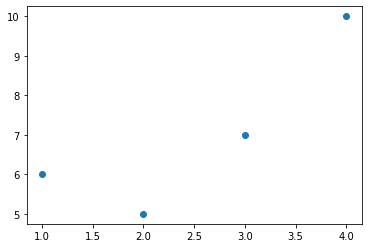

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

### S.4.3 선형 회귀식 풀기

x, y 값을 하나씩 입력하면, 아래 식이 성립한다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위 식을 모두 더해서 총오류를 구하면:

$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

위를 편미분하면:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

이를 풀면:

$\beta_0 = 3.5$

$\beta_1 = 1.4$

예측 값 $\hat{y}$를 계산해보자.

각 x 값에 기울기 1.4를 곱하고, y절편 3.5를 더해서 구할 수 있다.

$yhat=3.5 + 1.4 x$

x는 벡터 값으로 요소별 '$x \times 1.4 + 3.5$'와 같이 덧셈, 곱셈이 가능하다.

In [3]:
yhat=x*1.4+3.5

Python3의 출력기능이 있는 f를 사용하여 출력해보자.

In [4]:
f"predicted: {yhat}"

'predicted: [4.9 6.3 7.7 9.1]'

실제값과 예측값의 오류를 구해보자

In [5]:
f"predicted - actual: {yhat-y}"

'predicted - actual: [-1.1  1.3  0.7 -0.9]'

오류는 플러스, 마이너스 서로 상쇄될 수 있다. 오류의 제곱, 즉 RSS를 구하면 크기를 올바르게 알 수 있다.

In [7]:
f"error: {np.sum(np.power(yhat-y,2))}"

'error: 4.199999999999998'

### S.4.4 Python으로 미분해서 풀어보자

편미분 partial derivatives은 변수 가운데 하나를 선정하고 나머지는 상수로 보고 미분하는 것이다.
예를 들어, 

$
f(x,y) = x^2 + xy + y^2\\
\frac{\partial{f}}{\partial{x}} = 2x + y
$

SymPy는 수식이나 논리명제를 풀기위해 만들어진 Python 라이브러리이다.
Anaconda에는 이미 설치가 되어 있다. 설치가 필요하면 ```pip3 install sympy```라고 하면 된다.
sympy를 import 해서, sp로 사용해보자.

In [6]:
import sympy as sp

```symbols('b0,b1')```는 따옴표 안의 b0,b1을 변수로 선언한다.

In [7]:
b0,b1=sp.symbols('b0 b1')

앞서 구한 총오류 f함수를 b0, b1에 대해 미분을 해보자.

In [9]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1

diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어이다.
diff(f,b1)는 f함수를 b1에 대해서 미분하는 명령어이다.

In [10]:
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)

줄바꿈 ```\n```을 넣어서 출력하려면 f출력은 조금 복잡해진다.
"".format()으로 출력한다.

In [11]:
print ("fdiff with b0: {}\nfdiff with b1: {}".format(fdiff_b0, fdiff_b1))

fdiff with b0: 8*b0 + 20*b1 - 56
fdiff with b1: 20*b0 + 60*b1 - 154


위 식을 Sympy ```solve()```로 풀면 해를 구할 수 있다.
이 함수의:
* 첫째 인자는 수식이고, 0으로 놓고 풀게 된다.
즉 ```fdiff_b0 = 0, fdiff_b1 = 0```으로 하는 것과 동일하다.
* 그리고 두번째 인자로 넣은 b0, b1을 구하면 위에서 계산한 값과 동일한 결과가 나온다.

In [12]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])

In [13]:
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


### S.4.5 $R^2$

$R^2$는 **종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측**할 수 있는지를 나타낸다. 즉, 계산식 **총 오류TSS = 오류SSE +  잔여오류RSS**에서 **잔여오류RSS를 TSS총오류로 나누어** 계산한다.

$r^2=\frac{RSS}{TSS}$

* 총오류 TSS (Total Sum of Squared Errors)
* 오류의 합계 SSE (Sum of Squared Errors)
* 잔여 오류 RSS (Residual Sum of Squared Errors)

#### 데이터

x는 0~8의 정수로, y는 임의로 설정한다.

In [1]:
import numpy as np

x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

numpy에서 해주었던 것과 같이 ```np.ones(9)``` 명령어로 1을 넣어서 절편을 구해준다.

In [2]:
A=np.array([x, np.ones(9)])

In [3]:
print (A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


numpy에서 행과 열을 읽을 경우 인덱스로, 모든 행 (열)은 ```:```로 표기한다.

**행**을 읽을 경우, 즉 ```i```행의 모든 열은 ```A[i,:]``` 또는 ```:```는 생략해서 ```A[i]```로 읽고

In [4]:
A[0,:]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

**열**을 읽을 경우, 즉 모든 행 ```:```의 ```j```열은  A[:,j]로 읽는다.

In [5]:
A[:,1]

array([1., 1.])

**$x_{02}$ 또는 $x_{0}^{2}$**는 1번째 행(레코드), 3번째 컬럼(속성) A[0,2]로 읽는다.

In [6]:
A[0,2]

2.0

#### numpy listsq

numpy의 ```listsq()```를 사용하여, 데이터의 회귀식 계수 w0, w1을 계산해보자.
Python2에서는 ```np.linalg.lstsq(A.T, y)```, 그러나 ```np.linalg.lstsq(A.T, y, rcond=None)```라고 해준다.
```rcond```는 행렬 A의 특잇값 singular value의 cut-off 비율인데, 기본값을 적용하지 않겠다는 의미이다.

In [7]:
w0, w1=np.linalg.lstsq(A.T, y, rcond=None)[0]

In [8]:
print ("w0: {}\nw1: {}".format(w0, w1))

w0: 0.7166666666666672
w1: 19.188888888888897


예측 값을 구해보자. 실제 값과 얼마나 차이가 나는지 비교해보자.

In [9]:
yhat=w0*x+w1

In [10]:
print ("예측: {}".format(yhat))

예측: [19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


#### 그래프

예측 yhat과 실제 y의 그래프를 그려보자.
예측은 빨간 실선 (r-), 파란 점 (bo, 'b'는 blue, 'o'는 동그라미 점)으로 그린다.

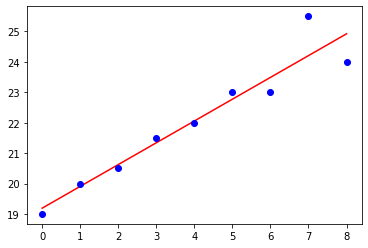

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

#### R squared 계산

총오류와 잔여오류를 계산해보자.

In [12]:
RSS = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)

In [27]:
r_squared = 1 - (float(RSS))/TSS

In [28]:
f"r_squared: {r_squared}"

'r_squared: 0.9138385502471171'

adjusted R-squared는 독립변수의 개수에 따라 과도한 $R^2$를 수정한 값이다.

$R^2\space adjusted=1 - \frac{(1-R^2)(n-1)}{n-k-1}$

* n은 데이터 개수
* k는 독립변수 개수

In [29]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1

In [30]:
f"adjusted_r_squared: {adjusted_r_squared}"

'adjusted_r_squared: 0.8851180669961561'

#### statsmodels R squared
statsmodels을 사용해서 회귀분석과 $R^2$를 알아보자.

In [31]:
import statsmodels.api as sm

In [32]:
result = sm.OLS(y, A.T).fit()

측정 값이 불과 9로 적어서 UserWarning이 뜬다.

In [33]:
result.summary()

/home/jsl/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           5.66e-05
Time:                        08:19:06   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.000       0.520       0.913
const         19.1889      0.396     48.458      0.000      18.253      20.125
==============================================================================
Omnibus:                        4.624   Durbin-Watson:                   3.078
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.154
Skew:                           0.773   Prob(JB):                        0.561
Kurtosis:                       3.830   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

(0.9138385502471168, 0.9015297717109907)

## S.5 matrix inverse method

### S.5.1 풀기

$\hat{w}$ 최소해를 구해보자.
오류 e는 잔차를 제곱해서 더한 합계 'sum of squared residuals' 이다.
따라서,
$f = e.T \times e = (y-wx)^T (y-wx) = y^Ty - 2w(x^Ty)^T+w^Tx^Twx$

위를 미분하면 $\frac{\partial f}{\partial w} =
    0 -2(x^Ty)+2wx^Tx$

위 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$

**위 식을 정리하면** $\hat{w} = (X^T X) ^{-1} X^T y$


### S.5.2 데이터

앞서의 경우와 달리, 속성이 2개이다.

입력변수 x1, x2 그리고 출력변수 y가 있다고 하자.

$2x_1 - 4x_2 = 8$

$3x_1 + 6x_2 = 9$

In [68]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [69]:
f"x: {x} y: {y}"

'x: [[2, -4], [3, 6]] y: [8, 9]'

```set_printoptions(precision=2, suppress=True)```는 출력 자릿수를 2자리로 제한할 수 있다.

In [70]:
np.set_printoptions(precision=2, suppress=True)

In [71]:
xI = np.linalg.inv(x) 
print("x inv:\n{}".format(xI))

x inv:
[[ 0.25  0.17]
 [-0.12  0.08]]


### S.5.3 identity matrix

행열에 역행렬을 서로 곱하면 1, 즉 단위행렬 identity matrix가 된다.

In [72]:
print ("identity matrix 'x * xI':\n{}".format(np.dot(x,xI)))

identity matrix 'x * xI':
[[1. 0.]
 [0. 1.]]


identity matrix는 ```np.eye()```로 구할 수 있다.

In [73]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

행열 x에 역행렬 xI을 서로 곱해서 단위행렬 identity matrix와 비교하면 True가 된다.

In [74]:
np.eye(2) == np.dot(x,xI)

array([[ True,  True],
       [ True,  True]])

### S.5.4 $\beta$

위 식을 행렬로 나타내면,
$\beta \times x = y$

양변에 $x^{-1}$를 곱하면 아래 식이 된다.

$x^{-1}\times x\times \beta=x^{-1}\times y$

inverse에 원래의 벡터를 곱하면 identity matrix가 된다.

즉 $x^{-1}\times x=1$이므로

아래와 같이 $\beta$를 구할 수 있다.

$\beta=x^{-1}\times y$

#### inverse 계산

**$xx^{-1}=I$**인 $x^{-1}$가 존재하면 x는 invertible이라고 한다.


```np.array()```는 ```np.linalg.inv()```, ```np.mat()```는 ```x.I```로 inverse를 계산한다.

In [43]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)

In [44]:
print ("v=\n{0}\nv.I=\n{1}".format(v,vI)) #([[-2.5, 1.5], [ 2. , -1. ]])

v=
[[2 3]
 [4 5]]
v.I=
[[-2.5  1.5]
 [ 2.  -1. ]]


inverse를 산식으로 계산하면 다음과 같다. 앞서 계산과 동일하다.

$\dfrac{1}{ad-bc} \begin{pmatrix}d & -b\\-c & a\end{pmatrix}$

In [55]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
f"{left*right}" #([-2.5,  1.5,  2. , -1. ])

'[-2.5  1.5  2.  -1. ]'

#### inverse로 $\beta$ 계산

matrix inverse method를 풀어보자.
numpy array로 행렬을 선언하고,
다음 식을 ```np.dot()```, ```np.linalg.inv()``` 함수를 이용해서 풀면 x1, x2를 구할 수 있다.


* $y = \beta x$인 경우, 양변을 $x^{-1}$로 곱하면
* $x^{-1}y = \beta x^{-1}x$ 여기서 $xx^{-1}=1$이므로 
* $\beta=x^{-1}\times y$

$
2 \times w1 - 4 \times w2 = 8\\
3 \times w2 + 6 \times w2 = 9
$

In [56]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [57]:
xI=np.linalg.inv(x)

In [58]:
w1,w2=np.dot(xI,y)
print(w1,w2)

3.5 -0.25


위에서 구한 값을 대입해서 식을 풀어보자.
주어진 데이터로 풀어서 얻은 w1, w2를 넣어서 구한 값은 8, 9이다.
오류가 전혀 없이 실제 값이 구해진다.

In [64]:
f"{2*w1+(-4)*w2}"

'8.0'

In [65]:
f"{3*w1+6*w2}"

'9.0'

### numpy solve

```numpy.linalg.solve()```는 선형 벡터 식을 풀 수 있다

위의 x,y를 넣으면 값을 구할 수 있다.

In [66]:
np.linalg.solve(x,y)

array([ 3.5 , -0.25])

## 문제: Matrix Inverse Method 회귀모델

x: 1,2,3,4
y: 6,5,7,10의 경우 회귀식을 도출해 보자.
답은 y=3.0 + 1.7x

### 데이터

주어진 x, y에서 numpy array를 생성한다.

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

절편을 구하기 위해 '1'을 추가한다.
즉 x0, x1으로 구성하고, 해당하는 w0, w1을 계산한다.

식을 y = wx로 다시 쓸 수 있다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


주의할 점은 x를 [x 1]로 변환한다는 점이다. 절편 값을 구하기 위해서 그렇게 해야 한다.

아래 데이터는 w1, w0을 각 행으로 구성하고 있다.

```python
[ 1.  1.]
[ 2.  1.]
[ 3.  1.]
[ 4.  1.]
```

$6 = \beta_1 \times 1 + \beta_0 \times 1$

$5 = \beta_1 \times 2 + \beta_0 \times 1$

$7 = \beta_1 \times 3 + \beta_0 \times 1$

$10 = \beta_1 \times 4 + \beta_0 \times 1$

원래의 데이터가 x는 행 2, 열 4로 구성되어서, transpose하면 4,2로 변환된다.

In [2]:
x=np.array([x, np.ones(len(x))])
x=x.T

In [3]:
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


### 항목별 계산

$\hat{w} = (X^T X) ^{-1} X^T y$ 식의 우측을 한 항목씩 계산해 나가보자.

#### 1) $X^T X$ 계산

이 항목을 계산할 경우, 행렬의 shape에 주의해야 한다.
현재 x는 (4,2) x.T는 (2,4)이다.

In [5]:
f"x shape: {x.shape} xT shape:{x.T.shape}"

'x shape: (4, 2) xT shape:(2, 4)'

In [4]:
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

위는 대칭선을 기준으로 동일하다. ```np.linalg.inv(singular maxtrix)```는 오류가 난다.
자신에게 자신의 Transpose를 곱한 결과는 singular matrx이다.
이 의미는 가역행렬이 아니라는 의미이다. 즉 inverse를 할 수 없다.

In [7]:
np.linalg.inv(np.dot(x,x.T))

LinAlgError: Singular matrix

> **singular matrix**

> 위 결과는 singular matrix이다.
singlular matrix의 inverse()는 할 수 없다.
다음과 같은 singular matrices는 inv() 연산을 할 수 없다.
```python
np.linalg.inv(np.array([[3,5],[6,10]]))
```

> 앞서 역행렬은 $\frac{1}{ad-bc} \begin{pmatrix}d & -b\\-c & a\end{pmatrix}$ 이렇게 계산했는데, 좌변이 0이면 계산이 가능하지 못하다. 즉 역행렬을 구할 수 없다. 위에서 3 x 10 - 5 x 6 = 0이다. 따라서 위 행렬은 역행렬이다.
또한 1d matrix를 자신의 transpose로 곱하면 singular matrix가 된다.
**첫째 행의 2배, 3배, 4배로 행이 구성되어 실제 1행만이 독립적인 값을 가지고 있다**.

x (4,2), x.T (2,4)의 dot()을 구하면 (4,4) 행렬이 된다.
**순서를 바꾸면 x.T (2,4) x (4,2) -> (2,2)**가 된다.

In [18]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

('xTx=', array([[ 30.,  10.],
       [ 10.,   4.]]))


#### 2) $(X^T X) ^{-1}$ 계산

In [20]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))


#### 3) $X^T y$ 계산

In [21]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

('xTyT=', array([ 77.,  28.]))


지금까지의 계산을 넣어서 weights를 구할 수 있게 된다.

#### 4) 전체 $(X^T X) ^{-1} X^T y$ 계산

In [22]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([ 1.4,  3.5]))


### 한 줄로 계산

좀 복잡하지만, 한 줄로 줄여서 연산해도 된다.
x0이 뒤에 위치해 있으므로, w1, w0으로 저장한다.

In [12]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

In [13]:
w0, w1

(3.499999999999993, 1.4000000000000021)

### numpy 최소자승법

데이터는 위 연습에서 사용했던 데이터를 그대로 사용하자.
앞서 가역행렬의 문제로 풀 수 없던 문제를 numpy 최소자승법으로 풀어보자.


```numpy.linalg.lstsq()```에는 컬럼벡터 x를 적어준다.
그 결과는 앞서 계산값과 일치한다.

함수의 입력을 적어준다.
* 독립변수 ```x```
* 종속변수 ```y```

그 반환 값은 가중치 weights이다. 독립변수 각 각에 대한 가중치이다.
$y=w_1\times x + w_0$ 순서대로 출력한다.

In [43]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([ 1.40,  3.50]), array([ 4.20]), 2, array([ 5.78,  0.77])))


w0,w1는 위에서 풀었던 해와 동일하게 계산된다.


In [42]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000006, '\nw0=', 3.4999999999999978)


### 정리하면

회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그려보자.

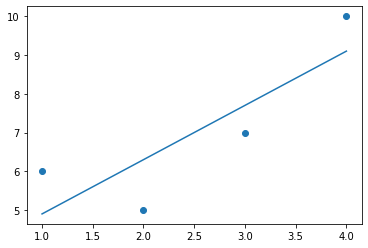

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# (1) data ready
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))]) # shape (2,4)
# (2) change (2,4) -> (4,2), so x0:1,2,3,4 x1:1,1,1,1
# w0 for x0, w1 for x1
_x=_x.T # shape (4,2)
# (3) compute w
#w1,w0=np.linalg.lstsq(_x, y, rcond=None)[0]
w1, w0=np.dot(np.linalg.inv(np.dot(_x.T, _x)), np.dot(_x.T, y)) #1.4 3.5
# (4) predicted
yhat=w0+w1*x
# (5) graph
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## 문제: Matrix Inverse Method 회귀모델

데이터가 다음과 같이 주어졌을 때:
* x [1,2],[1,4],[1,6]
* y 3,6,7

회귀식을 도출해보자.
* 1) matrix inverse method로 $\hat{w}$을 계산,
* 2) 예측과 실제의 오류 합계를 계산,
* 2) 입력 데이터와 회귀선의 그래프를 작성한다.

### (1) 데이터

In [2]:
import numpy as np

x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])

### (2) 데이터 구성 확인

x데이터는 행에 레코드, 열에 속성이 오도록 해야 한다.

In [3]:
print(x1.shape,y1.shape)

(3, 2) (3,)


컬럼에는 상수항과 속성의 순서에 유의한다.

In [4]:
print("x1:\n", x1)

x1:
 [[1 2]
 [1 4]
 [1 6]]


### (3) w 계산

w0은 x0, w1은 x1에 대해 계산한다.
```X.T*X```는 ```dot()```함수로 연산을 한다.

그 값의 inverse를 구한다.

```X.T*Y``` 역시 array는 ```dot()```함수로 연산을 한다.

위 계산을 가져와 weights를 구해보자.

In [8]:
print("weights=",np.dot(xTxI,xTyT))

weights= [1.33333333 1.        ]


### 줄여서 계산

앞서는 계산과정을 한 줄씩 해보았지만, 이번에는 줄여서 한 줄로 해보자.
입력 컬럼에 해당하는 가중치 $y= w_0 \times x_0 + w_1\times x_1$ 순서대로 출력한다.
즉, $w_0$은 첫째 컬럼인 절편 $x_0$, $w_1$은 둘째 컬럼인 $x_1$에 대한 계수이다.

In [10]:
f"w0:{w0} w1:{w1}"

'w0:1.3333333333333286 w1:1.0'

### 추가: matrix로 계산

지금까지는 array로 풀어보았다. 이번에는 matrix() 함수로 데이터를 만들고, matrix 연산을 해보자.

matrix의 역행렬은 간편하게 ```I``` 로 계산하고 있다.

위와 동일한 계수가 계산되었다.

In [15]:
print("weights=",xTxI*xTyT) #1.33 1.00 thus y=1.33+1.00x1+e

weights= [[1.33333333]
 [1.        ]]


###  numpy listsq

In [16]:
w0, w1 = np.linalg.lstsq(x1, y1, rcond=None)[0]
print(w0,w1)

1.3333333333333306 1.0000000000000004


### (4) 예측

#### 항목별 예측 계산

먼저 상수항을 제거하고 속성만 꺼내보자.

속성이 하나라서 식이 간단하지만, 속성을 순서대로 w와 연산해서 예측값을 계산한다.

In [19]:
f"predicted yhat: {yhat}"

'predicted yhat: [3.33333333 5.33333333 7.33333333]'

#### 벡터로 예측 계산

벡터로 계산해보자.

##### shape 정열

우선 w를 array로 만들어 준다.

x1,w의 ```dot()``` 연산을 하기 위해 차원을 맞추어 준다.

(2, ) -> (2, 1)로 맞추어 주면, **(3, 2), (2, 1) -> (3, 1)** 연산이 된다.
np.newaxis로 차원을 맞추어 준다.

> 1차원 Transpose

> 1차원의 ```x.T*x```를 구해보자.
numpy array **1d**는 ```[...,...,...]``` 형식으로 구성된다.
**1d는 transpose를 해도 변환이 되지 않는다**.
이럴 경우 **컬럼벡터** ```[[],[]]```로 만들어 trasnpose해야 한다.
np.newaxis 명령어로 ```[]```를 추가해서 ```[[],[]]```으로 변환해준다.
```python
x=np.array([1,2,3,4])
x[:, np.newaxis]
```
그 결과 [1,2,3,4]가 ([[1],[2],[3],[4]])로 변환이 된다.

In [57]:
f"w.shape: {w.shape}"

'w.shape: (2, 1)'

In [58]:
w

array([[1.33333333],
       [1.        ]])

###### 예측 계산

dot()연산으로 **예측치**를 출력할 수 있다.

In [60]:
f"predicted yhat: {pred}"

'predicted yhat: [[3.33333333]\n [5.33333333]\n [7.33333333]]'

y1 역시 차원을 맞추어 pred과 뺄셈 연산이 가능하도록 하자.

백터로 계산한 오류는 앞서의 결과와 동일하다.

In [62]:
_y1 - pred

array([[-0.33333333],
       [ 0.66666667],
       [-0.33333333]])

### (5) 오류 계산

#### 반복문으로 하나씩 계산

오류는 실제 y와 예측과 얼마나 차이가 있는지를 보여준다.
물론 벡터는 반복문을 사용하지 않아도 연산이 가능하다.
아래는 반복문을 사용하여 각 y값의 오류를 출력하고 있다.
```format()``` 함수는 인자의 순서와 출력형식을 설정해서 출력하여 준다.
예를 들어, **```{1:.2f}```**는 두 번째 float를 소수점 2자리로 출력하게 된다.

### 정리하면

회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그려보자.

## 문제: 온도의 회귀식, 그래프

온도 19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24로부터 회귀식을 도출하고, 그래프를 그려보자.

### 데이터

x는 단순히 기간으로 하고, y는 문제에 주어진 데이터로 하자.

In [88]:
import numpy as np

x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

상수를 도출하기 위해 '1' 행을 추가하자.

In [89]:
A=np.array([x,np.ones(len(x))])

### 데이터 shape

데이터는 컬럼에 속성이 오도록 하는데, A를 transpose하면 속성 2개, 레코드 9개로 구성이 된다.

In [90]:
f"A shape:{A.shape} {A.T.shape}"

'A shape:(2, 9) (9, 2)'

### numpy 회귀식

In [92]:
w=np.linalg.lstsq(A.T, y, rcond=None)[0]

In [93]:
fitted=w[0]*x+w[1]

In [94]:
f"predicted yhat: {fitted}"

'predicted yhat: [19.19 19.91 20.62 21.34 22.06 22.77 23.49 24.21 24.92]'

### 그래프

그래프의 markers는 색, 마커, 선모양으로 설정한다.
* 'bo-'는 줄여서 blue, marker 원, linestyle은 선으로 (linestyle='-', marker='o', color='b')
* 'r.-'는 빨간색으로 점(.)을 선(-)으로 이음.

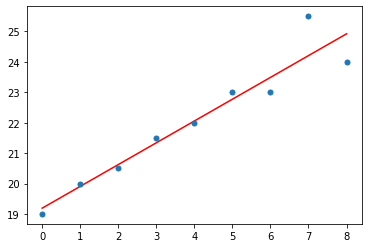

In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, fitted,'r-', x,y, 'o', markersize=5)
plt.show()

### 함수로 만들기

In [98]:
def drawRegress2d(x,y):
    """
    Parameters
    ----------
        arg1: list or array
        arg2: list or array
    Returns
    -------
        None
    Examples
    --------
        x=np.arange(0,9)
        y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
        drawRegress2d(x,y)
    """
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T, y, rcond=None)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line')
    plt.show()

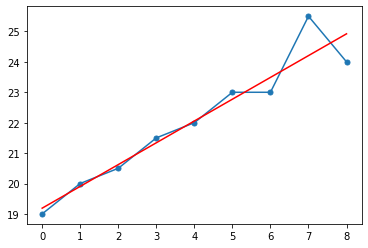

In [99]:
%matplotlib inline

import numpy as np
x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
drawRegress2d(x,y)

### batch, stochastic

* **batch gradient**, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
    * 반복:
        * $\theta$ $\forall i$
* **stochastic gradient descent** (incremental gradient descent) 데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있슴.
    * 반복
        * for i in range(m):
            * $\theta$ 갱신 $\forall i$

In [ ]:
경사도 하강은 오류를 최소화하기 위해, 경사도 상승은 수익을 극대화

예를 들어, $f(x,y) = x^2 + y^2$의 gradient를 구하면

$
\nabla f= \frac{\partial{f}}{\partial{x}},\
\frac{\partial{f}}{\partial{y}} = (2x,2y)
$

따라서 (1,1)에서 f값이 최대로 증가하는 방향은 (2,2)
그 기울기 (오류)는 $||(2,2)|| = \sqrt{2^2 + 2^2} = \sqrt{8}$

## S.6 Gradient 알고리즘


### gradient란?
기울기 하강법 Gradient decent algorithm은 **오류를 계산하고, 반복을 통해 이를 점진적으로 줄여가면서 최적해**를 찾는다.
gradient는 경사도를 말한다.
처음에는 무작위 값에서 출발하여, 오류를 줄여가는 방향으로 경사도를 줄여가며 최적해를 찾아가게 된다.
경사방법 Gradient algorithm은 **greedy 탐욕알고리즘**으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다.
오류함수가 2차함수인 경우 **local optimum**이 곧 global optimum이 된다.
탐욕적으로 계속 최적해를 구해나가야 한다.

OLS방법을 보편적으로 사용한다. 편미분해서 풀 수 있지만, 변인의 갯수만큼 방정식을 풀어야 한다.
극대점을 찾기 위해서는 gradient 방향으로 오르는 것을 gradient ascent, 반대는 gradient descent(ascent)로 반복을 하면서 계수를 구한다.
(matrix 연산은 $n^{2.373}$이 소요된다는 연구)

### 회귀식

우리가 찾고자 하는 회귀식 $h(x)$은 x를 선형적으로 $\theta$가중치를 곱해서 더한 함수로 나타낸다.
앞서의 회귀식과 동일하고, 기호만 다르게 사용되었다.
$h_{\theta}(x) = \theta_0x_0 + \theta_1x_1 + \ldots + \theta_nx_n$

이를 줄여서 표현하면:
$h_{\theta}(x)= \theta_{0} + \sum_{i=1}^n(\theta^Tx)$  ($x_0=1$)

### 오류
이 회귀식의 오류, 즉 $h(x) - y$는 **MSE Mean Squared Error**로 다음과 같이 나타낼수 있다.
예측과 실제의 차이를 서로 상쇄하지 않도록 제곱을 하고, 갯수로 나누어 평균으로 계산된다.

$J(\theta) = \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2$

이 식이 최소화할 수 있는 가중치 $\theta$를 추정한다.

### 경사도 계산

gradient는 그 점에서의 **기울기**로서 방향, 크기를 나타낸다.
벡터의 gradient는 '각 변수에 대한 편미분 벡터'이다.

$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$

$x_{n+1}=x_n-\alpha_n \nabla f(x_n),\ n \ge 0$이면
$f(x_0)\ge f(x_1)\ge f(x_2)\ge \cdots$이므로 결국 **최소값 local minimum**에 도달하게 된다.

$\alpha$는 학습율을 말한다.

앞서 정의한 오류 $J(\theta)$에 대해 gradient를 구하려면, 편미분을 해준다.

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{n} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{n} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=\frac{2}{n}\cdot (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=\frac{2}{n}\cdot (h_{\theta}(x) - y) x_j
\end{align}
$

위 식을 보면, **gradient는 오류에 x를 dot연산**해서 얻어진다.


### 갱신

$\alpha$는 학습비율 Learning Rate이며, 아래 값이 처음에는 큰 값으로 조정하다가, 반복이 계속될수록 적어지면서 0에 가까워질 때까지 현재 $\theta$를 갱신해 나간다. 앞 2/n는 학습비율이 정해지면 서로 곱해져서 의미가 적어지게 된다.

$\theta_j := \theta_j - \alpha\frac{2}{n}(h_\theta(x)-y)x_{j})$

### 상수항을 넣어서 계산

$h_\theta(x)$를 아래와 같이 전개하고 계산해도 마찬가지이다. **$x_0=1$이면 전개할 필요가 없다.**

* $J(\theta)$ $MSE =\frac{1}{n} \sum_{i=1}^n((ax_i+b) - y_i)^2$

오류를 편미분해서 기울기 gradient를 a,b에 대해 구하면 다음과 같다.
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (x_i)$
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (1)$

### 알고리즘

* 모든 계수 $\theta = 1$ (또는 무작위), $\alpha$ 설정
* 반복
    * $\theta$ 갱신
        * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

#### MSE 계산
개별 계산이므로 제곱오류 SE를 계산한다.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위 식을 모두 더해서 총오류를 구하면:

$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

#### 경사도

위를 $\beta_0$, $\beta_1$에 대해 편미분해서 구한 2개의 식은 (앞에서 이미 했지만):

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

$\beta_0 = 1, \beta_1 = 1$ 이면
각각 -28, -74이다.

이 값을 대입해서, 새로운 bo, b1을 구하면 (1.0925 1.035): 0.07 -> 0.035 74/4 = 18.5 -> 0.0925

* new b0 = 1 - 0.01 * (-28) = 1.28
* new b1 = 1 - 0.01 * (-74) = 1.74

### Sympy로 풀기

데이터를 생성하자.

In [13]:
import numpy as np

#x=np.array([[1,1],[1,2],[1,3],[1,4]])
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

풀고자 하는 변수 b0, b1을 생성하자.

In [14]:
import sympy as sp

w0,w1=sp.symbols('w0 w1')

In [15]:
np.sum(-2 * (y-(w0+x.dot(w1))))/len(x)
#np.sum(-2 * (y-np.dot(x.T,w1)))/len(x)

2*w0 + 5*w1 - 14

### 단계 1: 설정

#### 데이터

x와 y를 설정하자. 

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

x에 상수항을 넣어준다.

In [2]:
x=np.array([x, np.ones(len(x))])  # w0 * x0 + w1 * x1

x의 shape을 컬럼 속성으로 맞추어 주기 위해 x.T로 해서, 현재 2,4 -> 4,2로 맞추어 준다.

In [3]:
x=x.T

In [4]:
x, x.shape

(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.]]), (4, 2))

#### 학습비율
alpha는 학습율에 따라, 즉 반복마다 경사도의 일정비율만큼 감소시켜주게 된다.

In [5]:
alpha = 0.01

#### weights 초기화

우리가 구하려는 theta는 처음에 1로 설정한다.
속성 갯수 2개로 맞추어 준다.

In [5]:
theta=np.ones([x.shape[1]])

In [6]:
theta

array([1., 1.])

### 단계 2: gradient

#### h(x)

h(x)는 $x_1 \times \theta_{1} + x_0 \times \theta_{0}$으로 계산된다.
따라서:
```python
h(0) = (1 * 1 + 1 * 1) = 2
h(1) = (2 * 1 + 1 * 1) = 3
h(2) = (3 * 1 + 1 * 1) = 4
h(3) = (4 * 1 + 1 * 1) = 5
```

벡터 곱셈은 합계까지 구하지 않고, 요소별 곱셈만 한다.

In [8]:
x*theta

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

벡터는 dot연산으로 h(x)의 결과를 계산할 수 있다.

In [9]:
np.dot(x, theta)

array([2., 3., 4., 5.])

함수로 만들어보자.

In [10]:
def h(x, theta):
    return np.dot(x, theta)

h(x,theta)

array([2., 3., 4., 5.])

#### 단순 오류

h - y, 즉 예측 - 실제의 차이를 계산한다.

In [11]:
error=h(x,theta)-y

In [12]:
f"simple error h-y: {error}"

'simple error y-h: [-4. -2. -3. -5.]'

#### gradient

```python
np.sum(y-h)*(-2)/len(x)의 결과는 -7 (오류가 h-y인 경우는 마이너스 기호가 사라진다)
np.sum((y-h)*x)*(-2)/len(x) 결과는 -18.5
```

#### 상수항

아래 결과는 x 길이로 나누어주어서 그렇다.

In [15]:
np.sum(h(x,theta)-y)*(2)/len(x)

-7.0

#### x에 대한 w

dot연산을 해줄 경우 shape에 유의한다.
* ```x.T```는 ```(2,4)```,
* ```h(x,theta)```는 ```(4,)```,
* ```(2,4)```와 ```(4,)```를 dot연산을 하면 -> ```(2, )``` 결과가 계산된다.

In [17]:
np.sum(x.T*(h(x,theta)-y), axis=1)*(2)/len(x)

array([-18.5,  -7. ])

#### dot연산으로 한꺼번에 계산

$x_0$은 1이므로 위는 ```np.dot(x.T,error)```로 바꿔쓸 수 있다.

In [18]:
gradient=np.dot(x.T,error)*2/len(x) # w0, w1

In [19]:
f"gradient: {gradient}"

'gradient: [-18.5  -7. ]'

### 단계 3: update

기울기에 학습률을 곱하여 theta를 갱신하게 된다.

In [20]:
theta -= alpha*gradient

x의 모양은 (4,2)이고 컬럼2에 상수값을 가지고 있으므로, 아래 값은 w1, w0의 값이다.

In [21]:
f"theta: {theta}"

'theta: [1.185 1.07 ]'

### 단계 4: 반복 및 종료

1회 반복이 종료되었고 다음 반복을 해보자.

In [22]:
x

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [23]:
y

array([ 6,  5,  7, 10])

In [24]:
theta=np.array(np.ones([x.shape[1]]))

In [9]:
alpha=0.01

In [18]:
gradientDescent(x, y, theta, alpha, 10000)

iter:    0	theta [1.4 3.5] Cost 1.05000
iter:  100	theta [1.4 3.5] Cost 1.05000
iter:  200	theta [1.4 3.5] Cost 1.05000
iter:  300	theta [1.4 3.5] Cost 1.05000
iter:  400	theta [1.4 3.5] Cost 1.05000
iter:  500	theta [1.4 3.5] Cost 1.05000
iter:  600	theta [1.4 3.5] Cost 1.05000
iter:  700	theta [1.4 3.5] Cost 1.05000
iter:  800	theta [1.4 3.5] Cost 1.05000
iter:  900	theta [1.4 3.5] Cost 1.05000
iter: 1000	theta [1.4 3.5] Cost 1.05000
iter: 1100	theta [1.4 3.5] Cost 1.05000
iter: 1200	theta [1.4 3.5] Cost 1.05000
iter: 1300	theta [1.4 3.5] Cost 1.05000
iter: 1400	theta [1.4 3.5] Cost 1.05000
iter: 1500	theta [1.4 3.5] Cost 1.05000
iter: 1600	theta [1.4 3.5] Cost 1.05000
iter: 1700	theta [1.4 3.5] Cost 1.05000
iter: 1800	theta [1.4 3.5] Cost 1.05000
iter: 1900	theta [1.4 3.5] Cost 1.05000
iter: 2000	theta [1.4 3.5] Cost 1.05000
iter: 2100	theta [1.4 3.5] Cost 1.05000
iter: 2200	theta [1.4 3.5] Cost 1.05000
iter: 2300	theta [1.4 3.5] Cost 1.05000
iter: 2400	theta [1.4 3.5] Cost 1.05000


array([1.4, 3.5])

In [17]:
def gradientDescent(x, y, theta, alpha, numIterations):
    """
    new on 20201126
    in:
        x array
        y array
        #alpha=0.01
        #theta=np.array(np.ones([x.shape[1]])) # 2 of (4,2)
        #numIterations=10000
    out: theta weights
    """
    #alpha=0.01
    #theta=np.array(np.ones([x.shape[1]])) # 2 of (4,2)
    #numIterations=10000
    #i=0
    #oldCost=-np.inf
    #cost=np.inf
    for i in range(numIterations):
        #i+=1
        h=np.dot(x, theta)
        error=h-y
        #oldCost=cost
        cost=np.sum((h-y)**2) / len(x) # full MSE
        #cost=np.sum((h-y)**2) / (2 * len(x)) # half MSE
        #gradient=[np.sum(h-y)*2, np.sum((h-y)*2)*2]
        gradient=np.dot(x.T,error)*2/len(x) # w0, w1
        theta-=alpha*gradient
        if (i%100==0):
            print ("iter:{0:5d}\ttheta {1} Cost {2:.5f}".format(i, theta, cost))
    return theta

### Python List 데이터의 Gradient Descent

#### 함수

리스트를 사용하면 벡터와 달리 반복문을 사용하는 것이 필요하다.
앞서 행렬을 사용한 것과 달리, 상수항에 대한 w0을 별도로 계산하고 있다.

In [33]:
import random

def computeMSE(a,b,x,y):
    """
    new on 20201126
    """
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b* x[i])) ** 2
    return totalError / float(len(x))


def gradientDescentL(x,y,alpha,iter):
    """
    new on 20201126
    in:
        x: attribute, 1d float array or list
        y: class, 1d int array
        alpha: learning rate
        iter: n of iterations
    out:
        a, b (weights)
    """
    a=random.random()
    b=random.random()
    #alpha=0.01
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (((a + b * x[i])) - y[i])*(1)
            bGradient += (2./n) * (((a + b * x[i])) - y[i])*(x[i])
            #aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
            #bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print ("iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeMSE(a,b,x,y)))
    return a, b

#### 데이터

앞서 데이터는 상수항을 추가하였지만, 여기서는 w계산을 별도로 하기 때문에 상수항이 없게 된다.

In [34]:
#x=np.array([1,2,3,4])
#y=np.array([6,5,7,10])
x=[1,2,3,4]
y=[6,5,7,10]

#### 실행

a, b가 무작위로 설정되었으니 실행을 여러 번 해보면 초반의 출력결과가 다르게 되지만,
결국 동일한 값에 수렴하게 된다.

In [38]:
alpha = 0.01
a,b=gradientDescentL(x,y,alpha,5000)

iter:0 a=0.943 b=0.804 AvgError=17.860
iter:100 a=1.937 b=1.932 AvgError=1.458
iter:200 a=2.342 b=1.794 AvgError=1.274
iter:300 a=2.642 b=1.692 AvgError=1.173
iter:400 a=2.864 b=1.616 AvgError=1.118
iter:500 a=3.029 b=1.560 AvgError=1.087
iter:600 a=3.151 b=1.519 AvgError=1.070
iter:700 a=3.241 b=1.488 AvgError=1.061
iter:800 a=3.308 b=1.465 AvgError=1.056
iter:900 a=3.358 b=1.448 AvgError=1.053
iter:1000 a=3.395 b=1.436 AvgError=1.052
iter:1100 a=3.422 b=1.427 AvgError=1.051
iter:1200 a=3.442 b=1.420 AvgError=1.051
iter:1300 a=3.457 b=1.415 AvgError=1.050
iter:1400 a=3.468 b=1.411 AvgError=1.050
iter:1500 a=3.477 b=1.408 AvgError=1.050
iter:1600 a=3.483 b=1.406 AvgError=1.050
iter:1700 a=3.487 b=1.404 AvgError=1.050
iter:1800 a=3.490 b=1.403 AvgError=1.050
iter:1900 a=3.493 b=1.402 AvgError=1.050
iter:2000 a=3.495 b=1.402 AvgError=1.050
iter:2100 a=3.496 b=1.401 AvgError=1.050
iter:2200 a=3.497 b=1.401 AvgError=1.050
iter:2300 a=3.498 b=1.401 AvgError=1.050
iter:2400 a=3.498 b=1.401 A

#### w 출력

함수에서는 소수점 3자리로 출력하지만, 있는 그대로 출력하면 소수점에 다소의 차이가 있다.

In [40]:
print("---> a={0}, b={1} after iterations".format(a,b))

---> a=3.499999286911577, b=1.4000002425370226 after iterations


#### 예측

In [41]:
yhat=list()
for i in range(len(x)):
    yhat.append(a + b*x[i])

In [42]:
yhat

[4.8999995294486, 6.299999771985622, 7.700000014522645, 9.100000257059667]

#### 그래프

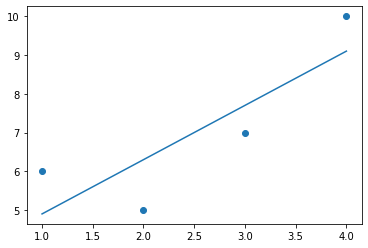

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()

## 문제: 키 몸무게를 matrix inverse method와 gradient descent로 풀기

### 1. matrix inverse

#### data

In [86]:
import os

file=open(os.path.join('data','ds_spark_heightweight.txt'))

In [87]:
import numpy as np
my=list()
for line in file:
    line=line.split()
    my.append([float(line[1]),float(line[2])])
my=np.array(my)

In [88]:
x=my[:,0]
y=my[:,1]

In [89]:
len(x)

50

In [90]:
x=np.array([x,np.ones(len(x))])
x=x.T

In [64]:
x, x.shape

(array([[65.78,  1.  ],
        [71.52,  1.  ],
        [69.4 ,  1.  ],
        [68.22,  1.  ],
        [67.79,  1.  ],
        [68.7 ,  1.  ],
        [69.8 ,  1.  ],
        [70.01,  1.  ],
        [67.9 ,  1.  ],
        [66.78,  1.  ],
        [66.49,  1.  ],
        [67.62,  1.  ],
        [68.3 ,  1.  ],
        [67.12,  1.  ],
        [68.28,  1.  ],
        [71.09,  1.  ],
        [66.46,  1.  ],
        [68.65,  1.  ],
        [71.23,  1.  ],
        [67.13,  1.  ],
        [67.83,  1.  ],
        [68.88,  1.  ],
        [63.48,  1.  ],
        [68.42,  1.  ],
        [67.63,  1.  ],
        [67.21,  1.  ],
        [70.84,  1.  ],
        [67.49,  1.  ],
        [66.53,  1.  ],
        [65.44,  1.  ],
        [69.52,  1.  ],
        [65.81,  1.  ],
        [67.82,  1.  ],
        [70.6 ,  1.  ],
        [71.8 ,  1.  ],
        [69.21,  1.  ],
        [66.8 ,  1.  ],
        [67.66,  1.  ],
        [67.81,  1.  ],
        [64.05,  1.  ],
        [68.57,  1.  ],
        [65.18, 

In [65]:
y

array([112.99, 136.49, 153.03, 142.34, 144.3 , 123.3 , 141.49, 136.46,
       112.37, 120.67, 127.45, 114.14, 125.61, 122.46, 116.09, 140.  ,
       129.5 , 142.97, 137.9 , 124.04, 141.28, 143.54,  97.9 , 129.5 ,
       141.85, 129.72, 142.42, 131.55, 108.33, 113.89, 103.3 , 120.75,
       125.79, 136.22, 140.1 , 128.75, 141.8 , 121.23, 131.35, 106.71,
       124.36, 124.86, 139.67, 137.37, 106.45, 128.76, 145.68, 116.82,
       143.62, 134.93])

#### w

In [66]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

In [67]:
print("w1:{} w0:{}".format(w1,w0))

w1:4.18697047973501 w0:-156.09138987513143


#### yhat

In [68]:
yhat = w0*x[:,1] + w1*x[:,0]

#### MSE

In [69]:
np.sum(np.power(y-yhat, 2))/len(x)

105.6444144864452

#### 그래프

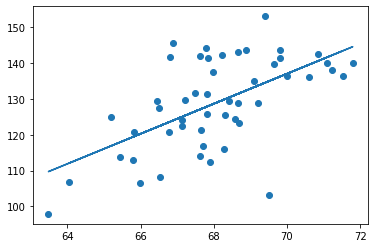

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhat)
plt.show()

### 2. ststsmodels과 비교

In [158]:
import statsmodels.api as sm
result = sm.OLS(y,x).fit()

In [159]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     25.97
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           5.81e-06
Time:                        07:13:44   Log-Likelihood:                -187.45
No. Observations:                  50   AIC:                             378.9
Df Residuals:                      48   BIC:                             382.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1870      0.822      5.096      0.000       2.535       5.839
const       -156.0914     55.933     -2.791      0.008    -268.552     -43.631
==============================================================================
Omnibus:                        1.591   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.792
Skew:                          -0.193   Prob(JB):                        0.673
Kurtosis:                       3.481   Cond. No.                     2.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
result.rsquared, result.rsquared_adj

(0.3510824732436807, 0.33756335810292404)

### 3. gradient

기울기가 매우 빠르게 변경되면, 오류 overflow가 나올 수 있다. alpha를 매우 작게 조정하면 된다.

#### 설정

In [71]:
x.shape, y.shape

((50, 2), (50,))

In [72]:
alpha = 0.0001
theta=np.array(np.ones([x.shape[1]]))

#### w

In [73]:
w1, w0=gradientDescent(x, y, theta, alpha, 10000)

Iteration 0 | theta [1.81584329 1.01195792] Cost 3713.55551
Iteration 100 | theta [1.88004846 1.01069023] Cost 123.00794
Iteration 200 | theta [1.88008091 1.00848025] Cost 123.00745
Iteration 300 | theta [1.88011336 1.00627029] Cost 123.00696
Iteration 400 | theta [1.88014581 1.00406037] Cost 123.00647
Iteration 500 | theta [1.88017826 1.00185048] Cost 123.00598
Iteration 600 | theta [1.88021071 0.99964062] Cost 123.00550
Iteration 700 | theta [1.88024316 0.99743079] Cost 123.00501
Iteration 800 | theta [1.88027561 0.995221  ] Cost 123.00452
Iteration 900 | theta [1.88030806 0.99301123] Cost 123.00403
Iteration 1000 | theta [1.88034051 0.99080149] Cost 123.00354
Iteration 1100 | theta [1.88037296 0.98859179] Cost 123.00305
Iteration 1200 | theta [1.8804054  0.98638212] Cost 123.00256
Iteration 1300 | theta [1.88043785 0.98417248] Cost 123.00208
Iteration 1400 | theta [1.8804703  0.98196286] Cost 123.00159
Iteration 1500 | theta [1.88050274 0.97975328] Cost 123.00110
Iteration 1600 | th

#### yhat

In [74]:
yhatGV = w0*x[:,1] + w1*x[:,0]

#### MSE

In [75]:
np.sum(np.power(y-yhatGV, 2))/len(x)

122.9596418153234

#### 그래프

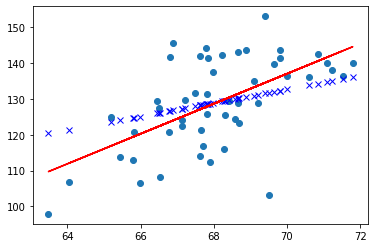

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0],y)
plt.plot(x[:,0],yhatGV,'bx') # gradient, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()

#### Python List로 gradient

gradientDescentL() 함수에는 상수항이 없는 데이터를 넣어야 한다.
상수항을 제거하고, x1으로 저장한다.

In [77]:
x1=x[:,0]

In [78]:
x1

array([65.78, 71.52, 69.4 , 68.22, 67.79, 68.7 , 69.8 , 70.01, 67.9 ,
       66.78, 66.49, 67.62, 68.3 , 67.12, 68.28, 71.09, 66.46, 68.65,
       71.23, 67.13, 67.83, 68.88, 63.48, 68.42, 67.63, 67.21, 70.84,
       67.49, 66.53, 65.44, 69.52, 65.81, 67.82, 70.6 , 71.8 , 69.21,
       66.8 , 67.66, 67.81, 64.05, 68.57, 65.18, 69.66, 67.97, 65.98,
       68.67, 66.88, 67.7 , 69.82, 69.09])

앞서 alpha와 동일하게 설정한다. alpha가 크면 하강기울기가 최적을 지나칠 수 있다는 점 유의하자.

In [79]:
a, b=gradientDescentL(x1,y,alpha,10000)

iter:0 a=0.537 b=1.777 AvgError=178.904
iter:100 a=0.537 b=1.887 AvgError=122.903
iter:200 a=0.534 b=1.887 AvgError=122.903
iter:300 a=0.532 b=1.887 AvgError=122.902
iter:400 a=0.530 b=1.887 AvgError=122.902
iter:500 a=0.528 b=1.887 AvgError=122.901
iter:600 a=0.526 b=1.887 AvgError=122.901
iter:700 a=0.523 b=1.887 AvgError=122.900
iter:800 a=0.521 b=1.887 AvgError=122.900
iter:900 a=0.519 b=1.887 AvgError=122.899
iter:1000 a=0.517 b=1.887 AvgError=122.899
iter:1100 a=0.515 b=1.887 AvgError=122.898
iter:1200 a=0.512 b=1.887 AvgError=122.898
iter:1300 a=0.510 b=1.887 AvgError=122.897
iter:1400 a=0.508 b=1.887 AvgError=122.897
iter:1500 a=0.506 b=1.887 AvgError=122.896
iter:1600 a=0.504 b=1.887 AvgError=122.896
iter:1700 a=0.501 b=1.888 AvgError=122.896
iter:1800 a=0.499 b=1.888 AvgError=122.895
iter:1900 a=0.497 b=1.888 AvgError=122.895
iter:2000 a=0.495 b=1.888 AvgError=122.894
iter:2100 a=0.493 b=1.888 AvgError=122.894
iter:2200 a=0.490 b=1.888 AvgError=122.893
iter:2300 a=0.488 b=1.8

In [80]:
a,b

(0.3186142756325941, 1.890211056651195)

예측 값을 구해서, 그래프를 그려보자.
a, b가 앞서 모델과 차이가 있다. 이 경우 MSE오류를 비교해본다.
위 **MSE=105.6과 비교해서 약간 크게** 되었다.

In [81]:
yhatGL=b*x1+a

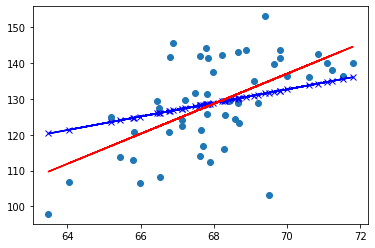

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x1,y)
plt.plot(x[:,0],yhatGL,'b-') # gradient with list, MSE=123
plt.plot(x[:,0],yhatGV,'bx') # gradient with vector, MSE=123
plt.plot(x[:,0],yhat,'r-') # matrix inverse, MSE=105.6
plt.show()

## 문제: 전복 나이의 예측: sklearn, spark 회귀분석

전복의 나이를 예측하는 문제이다.
전복은 껍질에 둥근 테 ring이 있는데, 이를 보고 나이를 판별할 수 있다.
이런 둥근 테의 갯수에 1.5를 더하면 계산할 수 있다 (Mayukh, 2010).
전복은 암치와 수치가 서식지가 서로 달라 먹이가 다르기 때문에, 내장의 색이 다르다. 내장 색이 짙은 녹색이면 암치, 황색이면 수치이다. 
전복의 성별 및 크기 관련 정보를 가지고 rings에 대해 회귀식을 도출해보자.
* (1) url에서 데이터 읽기
* (2) 기초통계
* (3) 상관관계
* (4) sklearn으로 회귀분석, 정확성
* (5) spark로 회귀분석, 정확성

참고:
* Mayukh, H. (2010). Age of Abalones using Physical Characteristics: A Classification Problem. ECE 539 Fall 2010 Project Report University of Wisconsin-Madison, 1-4.
* https://www.kaggle.com/ragnisah/eda-abalone-age-prediction

### (1) 데이터 읽기

데이터는 UCI Machine Learning Repository에서 제공하고, 전복관련 데이터 총 4177 건이 저장되어 있다.
변수는 sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, rings이고,
마지막 **rings 갯수**가 예측해야 하는 종속변수이다.

아래 URL을 웹브라우저에서 열면, 파일이 자동으로 내려받게 된다.
우리는 파일을 내려받지 않고, URL에서 데이터를 바로 읽게 된다.

In [89]:
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [90]:
import pandas as pd

column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [91]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 나이계산

나이는 rings에 1.5를 곱해서 구한다.

In [92]:
abalone["age"] = 1.5 * abalone["rings"]

무작위로 데이터를 선별해서 잘 읽혔는지 보자.

In [93]:
abalone.sample(n=5)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
1,M,0.350,0.265,0.09,0.2255,0.0995,0.0485,0.0700,7,10.5
2715,I,0.335,0.250,0.08,0.1670,0.0675,0.0325,0.0575,6,9.0
1757,F,0.730,0.560,0.19,1.9425,0.7990,0.5195,0.5655,11,16.5
4026,I,0.365,0.280,0.09,0.1960,0.0865,0.0360,0.0605,7,10.5
1559,I,0.435,0.335,0.10,0.3295,0.1290,0.0700,0.1100,7,10.5


### (2) 기초통계

회귀분석을 하기전, 기술통계를 데이터의 성격을 살펴보는 것이 필요하다.
**rings** 갯수는 1 ~ 29 정도로 분포되어 있다 
데이터 갯수가 4177로 일치하는지, 그렇지 않다면 결측 값이 있다는 것이다.
평균, 표준편차, 최대, 최소를 보면서 outlier를 확인한다.
**특이하게 height가 0**인 경우가 있다.

In [94]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,14.900527
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,4.836254
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,12.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,16.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000


height가 없는 경우를 살펴보자.
이 경우 데이터가 0인 이유를 알 수 없는 경우, (1) 평균으로 대체하거나, (2) 모두 결측으로 처리할 수 있다.
여기서는 모두 제거한다.

In [95]:
abalone = abalone[abalone['height']>0]

In [96]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,14.902635
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,4.836341
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,12.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,13.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,16.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000


### (3) 상관관계

상관관계는 서로 어떤 관계가 있는지 보여준다. 반면에 회귀식은 독립변수가 종속변수에 영향을 주는 관계를 나타낸다.
상관관계의 방향성과 강도에 따라 회귀식에서 그 변수가 가중치를 결정하는데 영향을 미치게 된다.

#### Pairplot
seaborn에서 제공하는 pairplot은 변수 간 상관관계를 시각화하여 준다.
seaborn은 그 자체로는 그래프를 그릴 수 없다.
matplotlib을 기반으로 하기 때문에 이를 import하고 ```plt.show()```
**hue**는 변수명을 선택하여 다른 색으로 그래프를 나타낸다.
이때 **diag_kind**를 ‘auto’, ‘hist’, ‘kde’ 가운데서 고르거나, 선택적 optional으로 정의하여 모양을 다르게 할 수 있다.

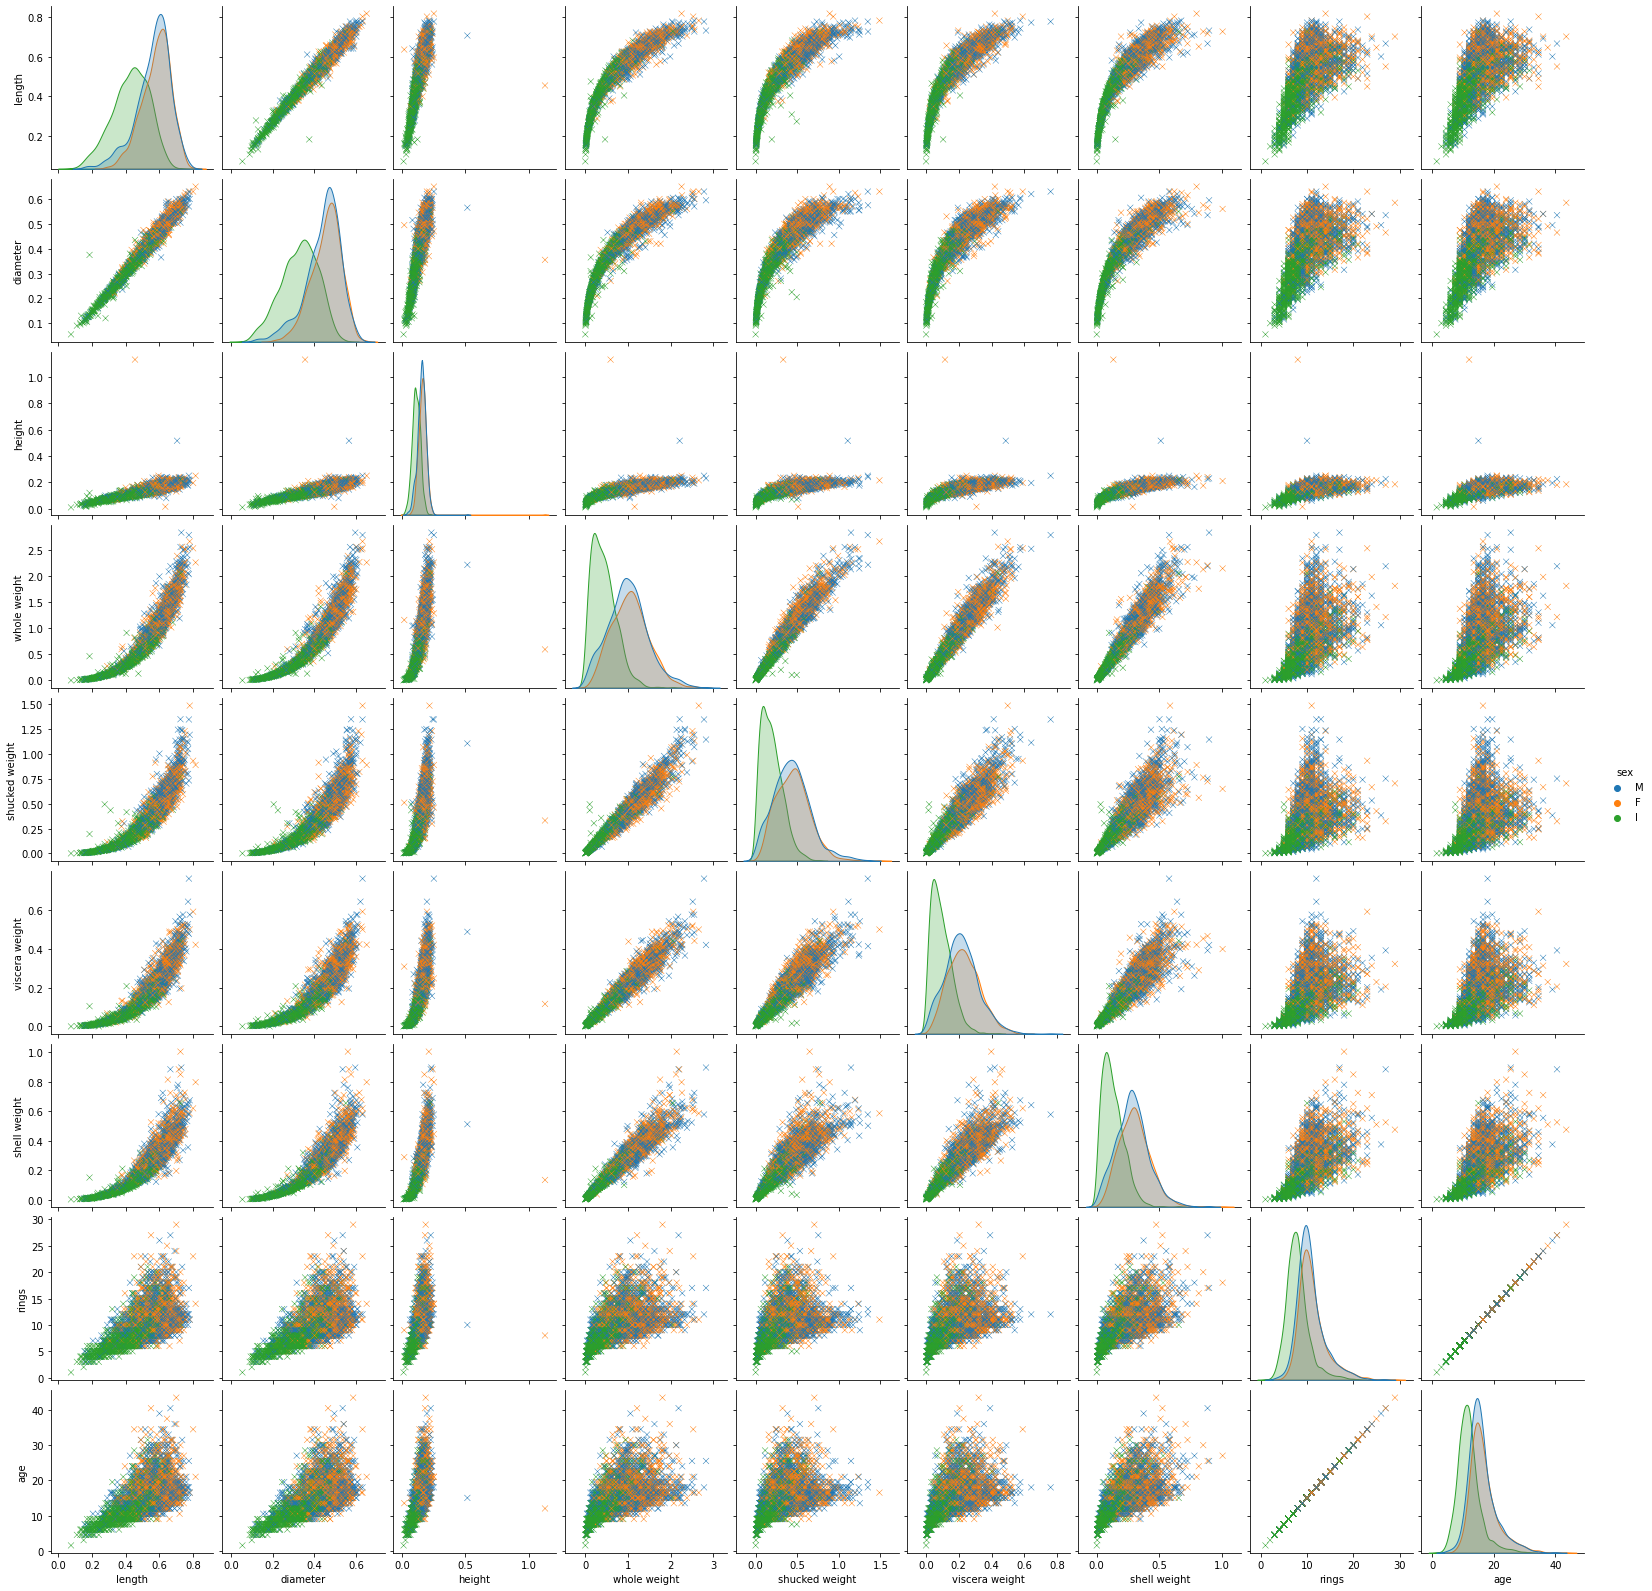

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
#plt.show()

#### heatmap

heatmap은 상관관계의 강도에 따라 색을 다르게 나타내게 된다.

<AxesSubplot:>

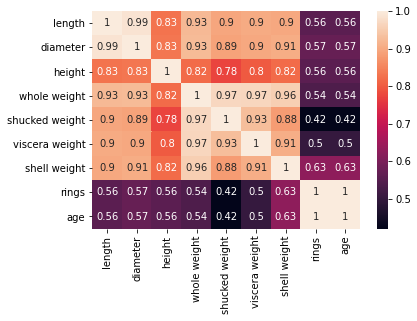

In [98]:
%matplotlib inline
corr = abalone.corr()
sns.heatmap(corr, annot=True)
#plt.show()

### (4) Sklearn

회귀분석의 입력변수에 명목변수가 있다면, 그대로 사용할 수 없다.

#### 명목변수 변환

'sex'는 명목변수이다. 각 각의 값에 대해 **dummy 변수** Male, Female, Infant로 변환한다.
성별 또는 학위구분 같은 명목변수는 회귀식에 0,1의 값을 가지는 **dummy 변수**로 변환해서 사용한다.

```python
sex        Male Female Infant
M          1     0     0
M       -> 1     0     0
F          0     1     0
M          1     0     0
I          0     0     1
```

#### Python으로 명목변수 처리

In [99]:
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

#### Sklearn OneHotEncoder

One-Hot Encoding은 명목변수를 이진벡터로 변환한다. 명목변수를 정수로 변환하게 되면, 예를 들어 M을 0, F를 1, I를 2로 설정하면 서로 순서가 있는 것으로 보일 수 있다. 이진벡터로 변환하면 이런 순서가 없도록 한다.

sklearn 0.22부터 특정 명목변수의 컬럼만 선택하여 ```OneHotEncoder(categorical_features = [0])``` 을 사용하지 못하게 되었고, ```sklearn.compose.ColumnTransformer```를 사용해야 한다.

* 우선 transformers는 (Name, Object, Columns)로 정해준다.
```[("sex", OneHotEncoder(handle_unknown='ignore'), [0])]```
    * '0'은 명목변수에 해당하는 컬럼의 인덱스이다.
    * ```handle_unknown```는 명목변수에 모르는 값이 존재할 경우, 무시 'ignore' 하라는 의미다.
* 명목변수가 아닌 다른 컬럼 remainder는 변환 없이 그냥 통과 'passthrough' (기본은 'drop'이다).


In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("sex", OneHotEncoder(handle_unknown='ignore'), [0])],
                       remainder = 'passthrough')
X = ct.fit_transform(abalone)

In [101]:
_abalone = pd.DataFrame(X)

In [102]:
_abalone.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.313054,0.320958,0.365988,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,14.902635,0.365988,0.313054,0.320958
std,0.463792,0.466901,0.481764,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,4.836341,0.481764,0.463792,0.466901
min,0.000000,0.000000,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,12.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,13.500000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,16.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,43.500000,1.000000,1.000000,1.000000


#### 훈련, 테스트 데이터 분리

앞서 Python으로 만든 명목변수 컬럼을 사용하여 회귀분석을 하자.
데이터를 일정 비율로 train, test로 나눈다.
train은  회귀식을 결정하기 위해 모델링에 사용한다. 반면에 test는 train된 모델이 잘 만들어졌는지 정확성을 분석할 때 적용되는 데이터이다.
train에 60%, test에 40%의 데이터를 분할한다.

In [103]:
#from sklearn.cross_validation import train_test_split # sklearn old version
from sklearn.model_selection import train_test_split

train, test = train_test_split(abalone, train_size=0.6)

종속변수인 age는 별도로 저장하고, 명목변수 sex와 rings는 제거하자.
(xtrain, ytrain)과 (xtest, ytest) 한 쌍으로 데이터를 준비한다.

In [119]:
from sklearn import linear_model

xtrain = train.drop(['age','rings','sex'],axis=1)
ytrain = train['age']
xtest = test.drop(['age','rings','sex'],axis=1)
ytest = test['age']

train, test 데이터의 컬럼이 원하는대로 포함되었는지 확인해보자.
60%의 갯수와 컬럼이 포함되어 있다는 것을 확인할 수 있다.

In [120]:
xtrain.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,Male,Female,Infant
3502,0.610,0.470,0.175,1.2140,0.5315,0.2835,0.3250,1,0,0
3855,0.410,0.335,0.115,0.4405,0.1900,0.0850,0.1350,1,0,0
3727,0.505,0.400,0.150,0.7750,0.3445,0.1570,0.1850,1,0,0
3513,0.660,0.500,0.175,1.3275,0.5560,0.2805,0.4085,0,1,0
4071,0.485,0.375,0.110,0.4640,0.2015,0.0900,0.1490,0,0,1


#### 회귀모델링

In [121]:
regression = linear_model.LinearRegression()
trainModel = regression.fit(xtrain, ytrain)

절편과 계수를 출력해보자.

In [122]:
trainModel.intercept_

5.221984589474122

In [123]:
trainModel.coef_

array([ -0.22278198,  18.28596718,  11.20969276,  12.45740852,
       -29.19253707, -14.71999747,  15.08676198,   0.48724164,
         0.3904133 ,  -0.87765493])

컬럼명과 계수를 같이 붙여서 보면 편리하다.

In [124]:
list(zip(xtrain.columns,regression.coef_))

[('length', -0.22278198109944347),
 ('diameter', 18.28596717607449),
 ('height', 11.209692758951709),
 ('whole weight', 12.45740851521752),
 ('shucked weight', -29.19253706638991),
 ('viscera weight', -14.71999747385833),
 ('shell weight', 15.086761979863944),
 ('Male', 0.48724163523341346),
 ('Female', 0.39041329678288417),
 ('Infant', -0.87765493201639)]

#### 정확성

방금 도출한 선형회귀식의 정확성을 계산해보자.
앞서 분리해 놓은 xtest, ytest에 적용한다.

In [125]:
# Explained variance score: 1 is perfect prediction
accuracy = regression.score(xtest,ytest)

In [126]:
f"accuracy: {accuracy*100:.2f}%"

'accuracy: 52.00%'

예측값과 실제값을 비교해보자.

In [127]:
ypred = regression.predict(xtest)

```flatten()```함수는 배열을 1차원으로 만들어 준다.

In [128]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})

실제 Actual과 예측 Predicted를 비교해보자. 518번째의 경우 그 차이가 크게 나왔고 나머지는 비교적 정확하게 예측되었다.

In [130]:
y_actual_pred.head()

,Actual,Predicted
518,6.0,11.109578
3452,12.0,13.932397
975,12.0,15.587216
49,13.5,15.673472
1041,15.0,18.757927


MSE 평균제곱오류를 계산해보자.

In [131]:
import numpy as np

print("Mean Squared Error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean Squared Error: 10.40


$R^2$을 계산해보자.

In [132]:
from sklearn.metrics import r2_score

r2 = r2_score(ytest, ypred )
f"r2: {r2:.3f}"

'r2: 0.520'

#### 그래프

아래 그림은 예측값 ypred, 실제값 ytest의 산포도를 보여주고 있다.
실선은 실제값 ytest이 예측값과 동일한 경우를 말한다. 즉 100% 정확한 경우를 의미한다.
데이터의 후반부는 **예측값이 약간 아래로 분포**함을 보여주고 있다.
이는 보다 정교한 모델링이 필요하다는 의미이다.

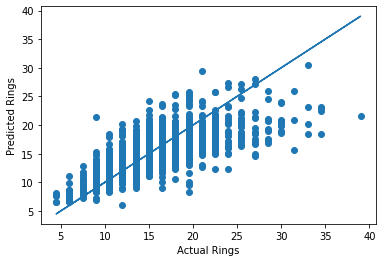

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

### (5) Spark

이번에는 Spark로 해보자. 앞서 Sklearn과 그 절차와 프로그래밍 코드가 비슷하다.

In [162]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [135]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

앞서 만들어 놓았던 4175건의 abalone 데이터를 DataFrame으로 만들어보자.

In [136]:
abalaoneDf=spark.createDataFrame(abalone)

In [137]:
abalaoneDf.printSchema()

root
 |-- sex: string (nullable = true)
 |-- length: double (nullable = true)
 |-- diameter: double (nullable = true)
 |-- height: double (nullable = true)
 |-- whole weight: double (nullable = true)
 |-- shucked weight: double (nullable = true)
 |-- viscera weight: double (nullable = true)
 |-- shell weight: double (nullable = true)
 |-- rings: long (nullable = true)
 |-- age: double (nullable = true)
 |-- Male: long (nullable = true)
 |-- Female: long (nullable = true)
 |-- Infant: long (nullable = true)



#### 성별

In [161]:
abalaoneDf.groupBy('sex').agg({"age":"avg"}).show()

+---+------------------+
|sex|          avg(age)|
+---+------------------+
|  F| 16.69395562356542|
|  M| 16.05824607329843|
|  I|11.837686567164178|
+---+------------------+



#### 훈련, 테스트 데이터 분리

In [138]:
(trainDf, testDf) = abalaoneDf.randomSplit([0.6, 0.4])

무작위로 분리하기 때문에, 분리할 때마다 60%인 2505개와 다소 차이가 있다.

In [139]:
trainDf.count()

2477

#### 회귀모델링

sex는 명목변수이고, 현재 string으로 설정되어 있어서, stringindexer를 거쳐 double타입으로 만들고, 그리고  onehotencoder로 vector로 변환한다.

In [140]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol="sex", outputCol="sexIndex")
#siModel = stringIndexer.fit(trainDf)
#siDf = siModel.transform(trainDf)

In [141]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(inputCol="sexIndex", outputCol="sexVec")
#enModel = encoder.fit(trainDf)
#enDf = enModel.transform(trainDf)

In [142]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["sexVec", "length", "diameter", "height", "whole weight", 
                                            "shucked weight", "viscera weight", "shell weight"],
                                   outputCol = 'features')
#vaDf = va.transform(trainDf)

In [143]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='age', maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lrModel = lr.fit(trainDf)

In [144]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[stringIndexer, encoder, va, lr])

In [145]:
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

#### weights

pipeline을 하고 나면, 단계별 결과를 ```stages[index]```를 통해 알 수 있다.
즉, ```stages[0]```은 stringIndexer, 
```stages[1]```은 다음 단계인 encoder를 접근할 수 있다. 회귀분석은 마지막이므로 ```-1```로 접근하면 된다.

결과는 앞서 Sklearn과 다소 차이가 있다. Spark에서는 무작위로 샘플을 선별하여 train, test를 구성하였기 때문이다.

In [146]:
print("Coefficients: {}".format(model.stages[-1].coefficients))
print("Intercept: {:.3f}".format(model.stages[-1].intercept))

Coefficients: [0.08654151482692603,0.31848438096584986,1.1858059485286412,4.331248024911635,28.608586325699438,0.0,-5.3276441333954745,0.0,16.28858942200197]
Intercept: 6.363


#### 예측

앞서 만들었던 trainDf에 대해 만들었던 pipeline 모델을 testDf에 적용한다.

In [147]:
modelTestDf=model.transform(testDf)

아래 결과에서 실제와 예측값의 차이를 볼 수 있다.

In [163]:
modelTestDf.select('age','prediction').show(10)

+----+------------------+
| age|        prediction|
+----+------------------+
| 7.5| 10.09678778294911|
| 9.0|10.048605599460803|
| 7.5| 10.52266738114831|
|10.5|10.441560976923984|
|10.5|11.324765953919506|
|13.5| 11.29478982878257|
| 9.0|11.228442975620716|
|15.0|11.624623950509573|
|15.0| 10.89041414364058|
| 7.5|11.298225338479808|
+----+------------------+
only showing top 10 rows



### 정확성

In [156]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="age", predictionCol="prediction", metricName="rmse")

In [157]:
rmse=evaluator.evaluate(modelTestDf)

In [158]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

'Root Mean Squared Error (RMSE) on test data: 3.759'

$R^2$를 계산해보자. 앞서 Sklearn에서는 ```sklearn.metrics.r2_score```를 사용하였지만, metricName만 r2로 교체하자.

In [159]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="age", predictionCol="prediction", metricName="r2")

In [160]:
f"r2: {evaluator.evaluate(modelTestDf):.3f}"

'r2: 0.418'

## S.8 Local Regression

회귀식은 모든 데이터를 고려해서, 오류가 최소화하도록 관계를 도출한다. 
반면에 LOESS (LOcally Estimated Scatterplot Smoothing)는 **근접한 데이터에 대해서는 가중치를 높이고, 멀어질수록 감소**시키는 방식이라 **국소회귀**라고 한다 (Cleveland, 1979).
오류의 평균을 최소화하게 되면서, 이로 인한 편차를 줄이기 위한 고안된 방법이다.


즉 $\hat{w} = (X^T W X) ^{-1} X^T W y$
* 표준회귀분석 ($\hat{w} = (X^T X) ^{-1} X^T y$)에 W를 반영
* W는 square matrix, 가까운 데이터에 가중치를 더해준다.

* Gaussian kernel
    * $w(i,j) = exp \frac{|x_i-x|}{-2\sigma^2}$
    * $\sigma$ 근접 데이터에게 할당되는 비율을 결정하는 계수
        * 범위 0~1
        * 1이면 근접데이터 뿐만 아니라 모든 데이터가 포함 (OLS와 동일)
        * 0.01이면 근접데이터에만 가중치 할당. 
    * $x_i - x$ 작으면 지수의 승수는 0에 가까워지고 $w(i,j) \approx 1$
    * $x_i - x$ 크면 지수의 승수는 큰 음수에 가까워지고 $w(i,j) \approx 0$


Cleveland, William S. (1979). "Robust Locally Weighted Regression and Smoothing Scatterplots". Journal of the American Statistical Association. 74 (368): 829–836. JSTOR

### 데이터 준비

https://www.itl.nist.gov/div898/handbook/datasets/LOESSCMP.DAT

```python
        X         Y 
----------------------
   0.5578196  18.63654
   2.0217271 103.49646
   2.5773252 150.35391
   3.4140288 190.51031
   4.3014084 208.70115
   4.7448394 213.71135
   5.1073781 228.49353
   6.5411662 233.55387
   6.7216176 234.55054
  7.2600583 223.89225
  8.1335874 227.68339
  9.1224379 223.91982
 11.9296663 168.01999
 12.3797674 164.95750
 13.2728619 152.61107
 14.2767453 160.78742
 15.3731026 168.55567
 15.6476637 152.42658
 18.5605355 221.70702
 18.5866354 222.69040
 18.7572812 243.18828
```

In [12]:
import os
file=open(os.path.join("data", "loessNistGov.txt"))

In [13]:
data=list()
for line in file:
    data.append(line.split())

In [3]:
import numpy as np
d=np.array(data)

In [4]:
x=d[:,0]
y=d[:,1]

In [5]:
x=x.astype('float')
y=y.astype('float')

In [6]:
x.shape, y.shape

((21,), (21,))

In [7]:
x.reshape(x.shape[0],-1)

array([[ 0.5578196],
       [ 2.0217271],
       [ 2.5773252],
       [ 3.4140288],
       [ 4.3014084],
       [ 4.7448394],
       [ 5.1073781],
       [ 6.5411662],
       [ 6.7216176],
       [ 7.2600583],
       [ 8.1335874],
       [ 9.1224379],
       [11.9296663],
       [12.3797674],
       [13.2728619],
       [14.2767453],
       [15.3731026],
       [15.6476637],
       [18.5605355],
       [18.5866354],
       [18.7572812]])

In [21]:
# locally weighted regression
# for non-linear
# Listing 8.2
def gaussianKernel(xtest, x, k=1.0):
    diff = xtest - x
    return np.exp(diff * diff.T / (-2.0 * k**2))
def localWeights(xtest, x, k=1.0):
    xmat = np.mat(x)
    rows = xmat.shape[0]
    # Create diagonal weight matrix from identity matrix
    weights = np.mat(np.eye(rows))
    for i in range(rows):
        weights[i, i] = gaussianKernel(xtest, xmat[i,:], k)
    return weights
# singular matrix error (k=0.001)
def localRegress(xt,x,k=1.0):
    rows=np.shape(xt)[0]
    yhat=np.zeros(rows)
    for i in range(rows):
        lws=localWeights(xt[i],x,k) #(200,200)
        xTwx=x.T*lws*x # (2,2) <- (2,200)*(200,200)*(200,2)
        if np.linalg.det(xTwx)==0.0:
            print ("singular matrix")
            return
        ws=xTwx.I*x.T*lws*y.T #(200,1)??
        yhat[i]=xt[i]*ws
        # print "i={0} yhat={1} xt={2}".format(i,yhat[i],xt[i])
    return yhat

yhatLocal=localRegress(x, x)

print (yhatLocal)

In [ ]:
statsmodels.nonparametric.smoothers_lowess.lowess

## S.9 Ridge

**Ridge** 회귀는 OLS + L2 제약조건을 추가한 방식으로, 이 방법을 제안한 Andre Tikhonov의 이름을 따서 Tikhonov regularization라고도 한다.

최적화 문제:
* min $f=RSS=\sum_{i=1}^n(y_i-w_0 - \sum_{j=1}^p w_jx_{ij})^2$
* s.t. $\sum_{j=1}^p w_j^2 \le t$
* 상수 $w_0$는 식에서 제외

Lagrange multiplier 적용해서 풀 수 있다.

즉 f = $(y-wx)^2 + \lambda w^2$ 오류를 최소화 하는 w를 찾는다.

위 식의 앞 부분은 RSS이고 뒷 부분은 L2 제약조건이다

* 위 식에서 $\lambda \rightarrow 0$, $\beta_{ridge} \rightarrow \beta_{ols}$
    즉 L2 제약조건이 사라지게 된다.
* 반면 $\lambda \rightarrow \infty$, $\beta_{ridge} \rightarrow 0$
    즉, 제약조건이 증가하게 된다.

위를 미분하면 $\frac{\partial f}{\partial w} =
-2(x^Tx + \lambda I)w -2x^Ty$
* $\hat{w} = (X^T X + \lambda I) ^{-1} X^T y$
* Identity matrix: n × n square matrix with ones on the main diagonal and zeros elsewhere (np.eye와 동일)
* 계산식에서 $X^T X$의 결과가 square matrix (X의 열갯수의 정방형)이라서, Identity Matrix로 연산함.

* gradient descent

βj := βj - α[(1/m)Σ(yi-f(xi))(xi)+(λ/m)βj]

Ridge regression의 단점은:
* 최종 모델에 모든 속성을 포함하게 됨.
* $\lambda$ 값이 증가하면 w를 줄일 수 있지만 0으로 만들지 못함
    (즉, 속성 제거 불가능) (unless $\lambda = \infty$)

In [19]:
# new from here 20150516
# ridge
# lasso

def ridgeGradientDescent(x, y, alpha, iters, L):
    x=np.matrix(x)
    y=np.matrix(y).T
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        yhat = np.dot(x, beta)
        residuals = yhat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        print "iteration:", i, "MSE:", MSE
        ols_gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (ols_gradient + (L/m)*beta)
    return beta

def ridgeWeights(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    xTxlamI = xTx + np.eye(np.shape(xMat)[1])*lam
    if linalg.det(xTxlamI) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTxlamI.I * (xMat.T*yMat)
    return ws


## S.10 Lasso

* ridge regression은 속성을 제거하지 못하지만, lasso는 속성을 제거할 수 있슴.
* Ridge regression과의 차이는 L1 norm penalty를 더함 (least absolute error)
* Minimize

$\sum (y-\hat{y})^2 \text{ s.t. }\sum_{j=1}^p w_j \le t$

* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda |w|$ 오류를 최소화 하는 w를 찾음.
* $\lambda$가 증가하게 되면, w가 0이 되는 속성이 생겨남. 변수제거 효과.

### Least angle regression algorithm:

* lasso를 계산하는 방식의 하나로서, 마지막 최종모델에는 영향이 적은 속성을 제거함. 아래 알고리듬에서 보듯이, 모든 변수가 포함되지 않더라도 stopping가능.


* Start with all weights $w_j = 0$
* Find the $x_j$ most correlated with residials (최소 RSS를 갖은 속성을 찾음)
* Increase the coefficient $w_j$ in the direction of the sign of its correlation with y (eps*sign). Take residuals rss=y-yhat along the way. Stop when some other predictor xk has as much correlation with r as $x_j$ has.
* Increase (bj, bk) in their joint least squares direction, until some other predictor xm has as much correlation with the residual r.
* Continue until: all predictors are in the model

## S.11 forward stagewise

* forward stagewise regression
    * 모든 변수를 포함하지 않아도 됨
    * Whereas forward selection finds the variable with the most explanatory power and goes all out in adding it to the model, forward stagewise finds the variable with the most explanatory power and updates its weight by only epsilon in the correct direction.
    * The problem now is to make a ton of updates, so forward stagewise can be very inefficient.

* x,y 표준값으로 ($\epsilon$증가가 표준화되도록)
* initialize intercept and all weights $w_0, w_1, \cdots ,w_p = 0$
* for niter
    * find the variable $x_j$ most correlated with residuals
    * update $w_j \leftarrow w_j + \epsilon \cdot sign<w,x_j>$
    * $w \leftarrow w$ if rss is lower 

In [18]:
def stageWise(x,y,eps=0.01,niter=100):
    xmat=np.mat(x)
    ymat=np.mat(y)
    ym=ymat.T-np.mean(ymat.T,0)
    # standardize (z value)
    xm=(xmat-np.mean(xmat,0))/np.var(xmat,0)
    r,c=np.shape(xm)
    ws=np.zeros((c,1))
    wsTest=ws.copy()
    wsMax=ws.copy()
    wsAll=ws.copy()
    for i in range(niter):
        lowestErr=np.inf
        # find xj with the least error
        for j in range(c):
            for sign in [-1,1]:
                # compute new w
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xm*wsTest #(r,1) = (r,c) (c,1)
                rssE=rss(ym,yTest)
                # find least error
                if rssE < lowestErr:
                    lowestErr=rssE
                    wsMax=wsTest
        # update w
        ws=wsMax.copy()
        wsAll=np.hstack((wsAll,ws))
    return wsAll

eps=0.01
abX,abY=regression.loadDataSet(abalone)
#[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
stageWs=stageWise(abX,abY,0.01,200)

print stageWs[:,200]

[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]


## S.11 비선형 모델

데이터가 선형적 관계를 가지고 있지 않을 경우, 
n차원 다항식 nth order polynomial을 표현하면 다음과 같다.

$\sum\limits_{i=0}^n a_i x^i$

이 경우 coefficients는 $a_n, a_{n-1},…,a_1, a_0$

numpy로 비선형 모델링을 해보자.
**```poly1d(coefficients)```**는 위 계수를 가지고 다항식을 만들어 준다. 이를 통해 예측값을 찾을 수 있다.
예를 들면, ```coefficients```는 내림차순으로 승수를 리스트로 적어준다.
즉 아래는 5개이므로 승수 4, 3, 2, 1, 0에 대한 계수 가각 0.2, 0, 3, -7, 5를 적어준다.


In [1]:
import numpy as np

f=np.poly1d( [ 0.2, 0, 3, -7, 5 ] )

아래와 같이 승수의 출력이 조금 부자연스럽지만 2줄을 붙여서 읽어보면:

$f(x) = \frac{x^4}{5} + 3x^2 - 7x + 5$

In [2]:
print(f)

     4     2
0.2 x + 3 x - 7 x + 5


### 선형 polyfit

**x**는 0~19의 정수의 값을 가지도록 생성한다.

In [3]:
npoints = 20
x = np.arange(npoints)

**y**는 기울기 slope 2, 절편 offset 3으로 설정하고, 약간의 무작위수 ```np.random.normal()```를 더한다.

In [4]:
slope = 2
offset = 3
y = slope * x + offset + np.random.normal(size=npoints)

x,y가 원하는대로 설정되었는지 확인해보자.

In [5]:
print("x:{}\ny:{}".format(x,y))

x:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y:[ 2.57961577  4.21575406  6.6718485   9.52659737 10.48345276 12.05432305
 13.0531873  18.63760717 19.67467932 22.55669031 24.00474036 26.40658628
 25.89402852 30.65657896 30.46351579 32.01302959 34.44448057 37.19711283
 37.39525735 41.53042368]


**```polyfit(x,y,deg)```** 함수는 데이터에 대한 회귀식을 구한다.
즉 데이터 x,y를, **deg는 차수**를 넣어준다.
즉 차수 1은 **선형** 즉 직선으로 y = mx + b 모델링하게 된다.

아래를 보면, x,y 데이터에 대해 1차식으로 회귀식을 구하여 계수와 절편을 계산해 준다.

In [6]:
p = np.polyfit(x,y,1)

In [7]:
f"p:{p}"

'p:[2.00720756 2.90450368]'

위 계수는 2개이므로, 1차원 식으로 만들어진다. 당연히 이 식은 예측 값을 출력할 때 사용한다.

In [8]:
f=np.poly1d(p)

In [9]:
print (f)

 
2.007 x + 2.905


그래프를 그려보자

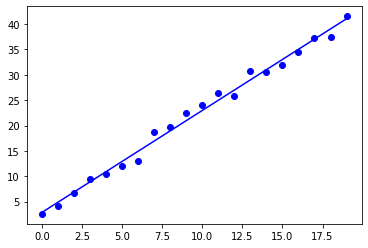

In [10]:
import matplotlib.pyplot as plt

f = np.poly1d(p)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x, f(x), 'b-',label="Polyfit")
plt.show()

In [103]:
# numpy.lstsq(x,y)에서 x는 2차원 y는 1차원 배열.
y=range(1,5)
x=range(11,15)
xx=np.vstack((x,np.zeros(len(x)))) #또는 >>> [ [v,0] for v in x ]
#xx=[ [v,0] for v in x ]

In [105]:
np.linalg.lstsq(xx.T,y, rcond=None)
# (array([ 0.20634921,  0.        ]), array([], dtype=float64),
# 1, array([ 25.0998008,   0.       ]))

(array([0.20634921, 0.        ]),
 array([], dtype=float64),
 1,
 array([25.0998008,  0.       ]))

In [108]:
# 손으로 OLS 회귀분석 (inverse error)
p = (x.T * x).I * x.T * y
# np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
(p, residuals, rank, s) = np.lstsq(x, y)
p = np.polyfit(x, y, degree)

AttributeError: 'range' object has no attribute 'T'

### 비선형 polyfit

In [20]:
# 1) numpy.poly1d one-dimensional polynomial class
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

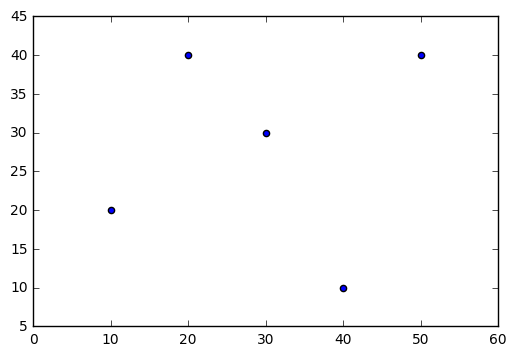

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [22]:
np.linspace(1,10,10)
#np.arange(1,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [23]:
coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial

coefficients= [  6.66666667e-03  -5.92857143e-01   1.54047619e+01  -8.20000000e+01]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


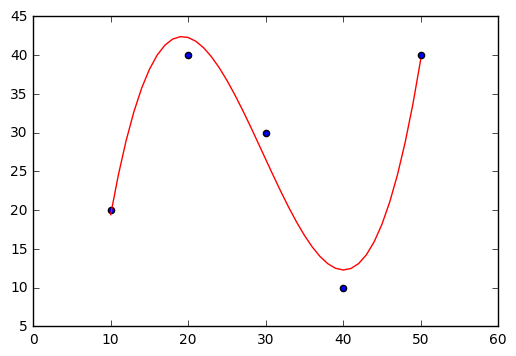

In [24]:
plt.scatter(x,y)
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()

### 미적분

```q(x) = 2x^2 - x + 3```를 예제로 미분해보자.

In [25]:
q=np.poly1d( [ 2, -1, 3 ] )
print q

   2
2 x - 1 x + 3


In [27]:
print q(0)
print q(1)
print q(2)

3
4
9


In [28]:
print q.deriv() #poly1d([ 4, -1])

 
4 x - 1


In [29]:
# integration 적분
print q.integ() #poly1d([ 0.66666667, -0.5       ,  3.        ,  0.        ])

        3       2
0.6667 x - 0.5 x + 3 x


In [30]:
# polyfit - least-squares polynomial fit
x=[0., 1., 2., 3., 4.]
y=[1., 2., 5., 10., 17.]
print x #[0.0, 1.0, 2.0, 3.0, 4.0]
print y #[1.0, 2.0, 5.0, 10.0, 17.0]
p=np.poly1d(np.polyfit(x,y,2))
print p #poly1d([  1.00000000e+00,  -4.10782519e-15,   1.00000000e+00])

#식을 출력
print "--------"
print "p=",p
print "--------"
print "q=",q

#식을 연산할 수도 있다
print "--------"
print "p+q=",p+q

[0.0, 1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 5.0, 10.0, 17.0]
   2
1 x - 4.338e-15 x + 1
--------
p=    2
1 x - 4.338e-15 x + 1
--------
q=    2
2 x - 1 x + 3
--------
p+q=    2
3 x - 1 x + 4


## 문제: iris데이터를 numpy, statsmodels, sklearn, pyspark로 회귀분석

앞서 사용했던 iris데이터를 사용해서 회귀분석을 해보자.
독립변수는 petal_length 컬럼, 종속변수는 petal_width 컬럼으로 해보자.
* (1) DataFrame 생성
* (2) 데이터와 회귀선 그래프
* (3) Spark를 사용하여 회귀분석하고 계수 출력
* (4) 실제와 예측 출력
* (4) 정확성 평가

### (1) 데이터

데이터를 UCI 웹사이트에서 읽어보자.
csv파일은 순수 데이터로만 구성되어 있어, 컬럼명```names```을 별도로 넣어준다.
데이터가 잘 읽혀졌는지 ```head()``` 함수로 일부 읽어보자.

In [29]:
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [30]:
import pandas as pd

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

### (2) 통계량

```describe()```는 개수, 평균, 표준편차, 최대, 최소, 분기 값의 기본 통계량을 계산해 준다.
데이터 개수는 150개 서로 동일하다. 서로 다르면 **결측 값**이 있을 수 있다.
평균에 비해 표준편차가 너무 크지 않은지 살펴본다.
또한 최대, 최소를 비교해서 오류가 있는지, 예를 들면 마이너스 값이나 과도하게 큰 최대 값을 살펴본다.
**```outlier```**는 회귀식을 왜곡할 수 있어서 주의가 필요하다.

In [13]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


```isnull()``` 함수로 missing values 결측 값이 있는지 확인한다.

In [14]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### (3) 그래프

#### 히스토그램

iris데이터의 pairplot은 앞서 '통계' 장에서 그렸으므로, 여기서는 히스토그램을 그려서 분포모양을 살펴보자.

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

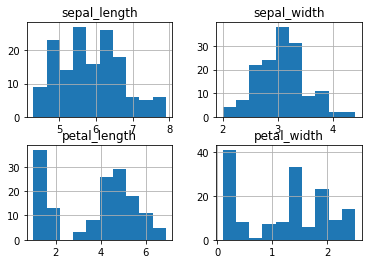

In [31]:
%matplotlib inline

iris.hist()

#### 회귀선 그래프

우선 ```petal_length```와 ```petal_width``` 두 변수간 데이터의 산포도와 회귀식을 그래프로 그려보자.
```sns.lmplot()```는 입력변수 x, y, DataFrame을 인자로 넣어준다.
여기서 x, y는 DataFrame의 컬럼명을 적는다는 점에 주의한다.

종에 따라 회귀선을 그려보자. 회귀선이 서로 조금씩 다르다는 것을 알 수 있다.

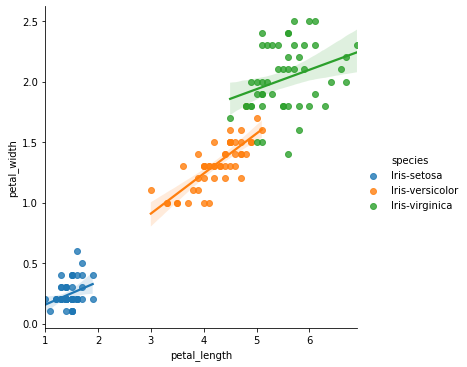

In [38]:
import seaborn as sns

sns.lmplot(x="petal_length", y="petal_width", data=iris, hue='species')

### (4) numpy 회귀분석

numpy로 ```petal_length```와 ```petal_width```를 회귀분석해보자.

#### 종속변수, 독립변수 설정

In [ ]:
import numpy as np

x=iris["petal_length"]
y=iris["petal_width"]

x에는 절편을 도출하기 위해 1을 추가해서, 다음과 같이 만들어진다.

```python
[ 1.4,  1. ]
[ 1.4,  1. ]
[ 1.3,  1. ]
[ 1.5,  1. ]
```

In [45]:
A=np.array([x, np.ones(len(x))])

In [44]:
print("A=\n{}\ny=\n{}".format(A.T[:5], y[:5]))

A=
[[1.4 1. ]
 [1.4 1. ]
 [1.3 1. ]
 [1.5 1. ]
 [1.4 1. ]]
y=
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64


#### 최소자승법

numpy의 최소자승법 결과는 [ 0.41641913, -0.36651405]이다.
이는 y=ax+b에서 a=-0.36651405, b=0.41641913이다.

lstsq()에서 반환하는 두 번째 반환 값은 잔차 residuals이다.

In [47]:
print("Least Sq: ", np.linalg.lstsq(A.T, y, rcond=None))

Least Sq:  (array([ 0.41641913, -0.36651405]), array([6.34349195]), 2, array([52.03171411,  5.06958846]))


```vander(x,n)``` 함수를 사용해도 된다. 역시 같은 결과가 도출된다.
**1차원 배열 x**, **정수 n**을 받아서, **Van der Monde 매트릭스**를 생성한다.
첫째 컬럼은 $x^{n-1}$, 두번째는 $x^{n-2}$와 같이 생성된다.

In [48]:
Av = np.vander(x, 2)  #add a constant row for an intercept
print(Av[:5])

[[1.4 1. ]
 [1.4 1. ]
 [1.3 1. ]
 [1.5 1. ]
 [1.4 1. ]]


In [50]:
np.linalg.lstsq(Av, y, rcond=None)

(array([ 0.41641913, -0.36651405]),
 array([6.34349195]),
 2,
 array([52.03171411,  5.06958846]))

### (5) statsmodels 회귀분석

입력값은 x의 Transpose인 A.T로 입력값을 적어준다.
그 결과는 R의 결과값과 같이 출력된다.
results coef의 x1, const의 값이 동일하게 도출된다.

In [51]:
import statsmodels.api as sm

model = sm.OLS(y, A.T)

In [52]:
results = model.fit()

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           5.78e-86
Time:                        17:45:08   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4164      0.010     43.320      0.0

### (6) sklearn 회귀분석

앞과 동일하게, 입력값은 x의 Transpose인 A.T로 입력값을 적어준다.

In [54]:
from sklearn.linear_model import LinearRegression

x = iris["petal_length"]
y = iris["petal_width"]
A=np.array([x, np.ones(len(x))])

In [55]:
model = LinearRegression()

In [56]:
results = model.fit(A.T, y)

절편과 기울기를 출력해보자. 앞서 계산한 결과와 동일하다.

In [58]:
results.intercept_

-0.3665140452167277

In [59]:
results.coef_

array([0.41641913, 0.        ])

### (7) Spark 회귀분석

이번에는 Spark로 회귀선을 구해보자.

In [1]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

#### 데이터프레임

In [63]:
irisDf = spark.createDataFrame(iris)

In [67]:
irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



#### features

Spark 회귀분석을 하기 위해서는, features 벡터 컬럼이 만들어져야 한다.

모델링의 결과는 상수항을 넣지 않아도 절편과 기울기를 계산하면, 앞서의 결과와 동일하다.

In [79]:
print("Intercept: " + str(lr_model.intercept))

Intercept: -0.3665140452167314


## 문제: 매출 회귀분석

Advertising.csv는 Kaggle https://www.kaggle.com/bumba5341/advertisingcsv 을 다운로드

### 데이터

In [80]:
advDf = spark.read\
        .format('com.databricks.spark.csv')\
        .options(header='true', inferschema='true')\
        .load(os.path.join("data", "Advertising.csv"));

In [81]:
advDf.show(3)

+---+-----+-----+---------+-----+
|_c0|   TV|Radio|Newspaper|Sales|
+---+-----+-----+---------+-----+
|  1|230.1| 37.8|     69.2| 22.1|
|  2| 44.5| 39.3|     45.1| 10.4|
|  3| 17.2| 45.9|     69.3|  9.3|
+---+-----+-----+---------+-----+
only showing top 3 rows



In [82]:
advDf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- TV: double (nullable = true)
 |-- Radio: double (nullable = true)
 |-- Newspaper: double (nullable = true)
 |-- Sales: double (nullable = true)



### 통계값

In [83]:
advDf.select("TV", "Radio", "Newspaper", "Sales").describe().show()

+-------+-----------------+------------------+------------------+------------------+
|summary|               TV|             Radio|         Newspaper|             Sales|
+-------+-----------------+------------------+------------------+------------------+
|  count|              200|               200|               200|               200|
|   mean|         147.0425|23.264000000000024|30.553999999999995|14.022500000000003|
| stddev|85.85423631490805|14.846809176168728| 21.77862083852283| 5.217456565710477|
|    min|              0.7|               0.0|               0.3|               1.6|
|    max|            296.4|              49.6|             114.0|              27.0|
+-------+-----------------+------------------+------------------+------------------+



### features, label 컬럼 생성

#### rdd로 id가 있는 컬럼을 제거

```r[1:-1]```

In [89]:
from pyspark.mllib.linalg import Vectors

_advDf = advDf.rdd.map(lambda r: [Vectors.dense(r[1:-1]),r[-1]]).toDF(['features','label'])

In [90]:
_advDf.show(3)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[230.1,37.8,69.2]| 22.1|
| [44.5,39.3,45.1]| 10.4|
| [17.2,45.9,69.3]|  9.3|
+-----------------+-----+
only showing top 3 rows



DataFrame 그대로 features 컬럼을 생성해도 된다.

In [91]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["TV", "Radio", "Newspaper", "Sales"], outputCol="features")

In [92]:
_advDf = va.transform(advDf)

데이터가 잘 변환되었는지 특정 조건을 넣어 확인해보자.

In [93]:
from pyspark.sql import functions as f

_advDf.filter(f.col('Sales')<2).show()

+---+---+-----+---------+-----+------------------+
|_c0| TV|Radio|Newspaper|Sales|          features|
+---+---+-----+---------+-----+------------------+
|131|0.7| 39.6|      8.7|  1.6|[0.7,39.6,8.7,1.6]|
+---+---+-----+---------+-----+------------------+



### training, test 데이터 분리

In [94]:
trainDf, testDf = _advDf.randomSplit([0.7, 0.3])

In [95]:
trainDf.show(3)

+---+-----+-----+---------+-----+--------------------+
|_c0|   TV|Radio|Newspaper|Sales|            features|
+---+-----+-----+---------+-----+--------------------+
|  1|230.1| 37.8|     69.2| 22.1|[230.1,37.8,69.2,...|
|  2| 44.5| 39.3|     45.1| 10.4|[44.5,39.3,45.1,1...|
|  3| 17.2| 45.9|     69.3|  9.3|[17.2,45.9,69.3,9.3]|
+---+-----+-----+---------+-----+--------------------+
only showing top 3 rows



### 회귀분석

In [96]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='Sales')

In [97]:
lr_model = lr.fit(trainDf)

In [98]:
print("Coefficients: " + str(lr_model.coefficients))

Coefficients: [-4.7899833825650736e-17,-1.6092538893334247e-16,6.45978784613508e-18,1.0000000000000009]


In [99]:
print("Intercept: " + str(lr_model.intercept))

Intercept: -3.045364738230452e-15


### 예측

In [100]:
predictions = lr_model.transform(testDf)

In [101]:
predictions.show(5)

+---+-----+-----+---------+-----+--------------------+------------------+
|_c0|   TV|Radio|Newspaper|Sales|            features|        prediction|
+---+-----+-----+---------+-----+--------------------+------------------+
|  5|180.8| 10.8|     58.4| 12.9|[180.8,10.8,58.4,...|12.899999999999997|
|  9|  8.6|  2.1|      1.0|  4.8|   [8.6,2.1,1.0,4.8]| 4.800000000000001|
| 10|199.8|  2.6|     21.2| 10.6|[199.8,2.6,21.2,1...|10.599999999999994|
| 14| 97.5|  7.6|      7.2|  9.7|  [97.5,7.6,7.2,9.7]|               9.7|
| 15|204.1| 32.9|     46.0| 19.0|[204.1,32.9,46.0,...|              19.0|
+---+-----+-----+---------+-----+--------------------+------------------+
only showing top 5 rows



### 평가

In [102]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="Sales", predictionCol="prediction", metricName="rmse")

In [103]:
rmse=evaluator.evaluate(predictions)

In [104]:
rmse

2.5536738534564335e-15

In [105]:
print("Root Mean Squared Error (RMSE) on test data = %.16f" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.0000000000000026


## 문제: 주택가격의 sklearn (Lasso, Ridge), Pyspark로 회귀분석

1978년 보스턴 지역에 위치한 주택 관련 범죄율 등 560건 수집되어 UCI Machine Learning Repository에서 제공하고 있다.
이 데이터로부터 회귀식을 도출해보자.

### 데이터

sklearn의 datasets를 사용하기로 한다.

In [106]:
from sklearn import datasets

boston=datasets.load_boston()

저장되어 있는 데이터 구분을 보자.
* ```data```는 말 그대로 원본 데이터
* ```feature_names```는 속성명
* ```DESCR```는 데이터 관련한 설명을 제공하고 있고
* ```target```은 종속변수 '주택가격'으로, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

In [107]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


```boston.DESCR```를 사용해 데이터 관련 설명을 볼 수 있다.
주택관련 정보로서 다음과 같이 구성되어 있다.
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

In [108]:
print(boston.DESCR)[:1000]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

TypeError: 'NoneType' object is not subscriptable

데이터는 행 506, 열 13로 구성되어 있다.

In [109]:
print(boston.data.shape)

(506, 13)


속성명을 출력해보자.

In [110]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


주택가격에 대해 그래프를 그려보자.
```boston.data[행, 열]```로 표기한다. 예를 들어 ```[:,1]```는 1열의 모든 행을 의미한다. 

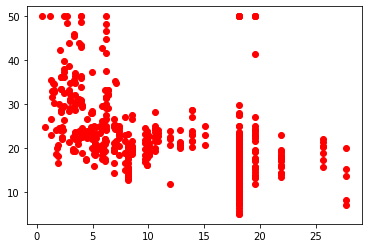

In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(boston.data[:,2], boston.target, color='r')
plt.show()

### X,Y

데이터를 Pandas로 변환해서 일부를 출력해보자.

In [112]:
import pandas as pd

X=pd.DataFrame(boston.data, columns=boston.feature_names)

In [113]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


X 데이터프레임에 Y를 추가하려면 간단하게 컬럼명을 정해주고 Y를 할당하면 된다.
```python
X['MEDV']=Y
```

boston.target을 종속변수로 설정하자. 

In [114]:
Y = pd.DataFrame(boston.target, columns=["MEDV"])

In [115]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 탐색

일부 "RM", "AGE", "RAD"의 상호 연관성을 그래프로 그려보자.

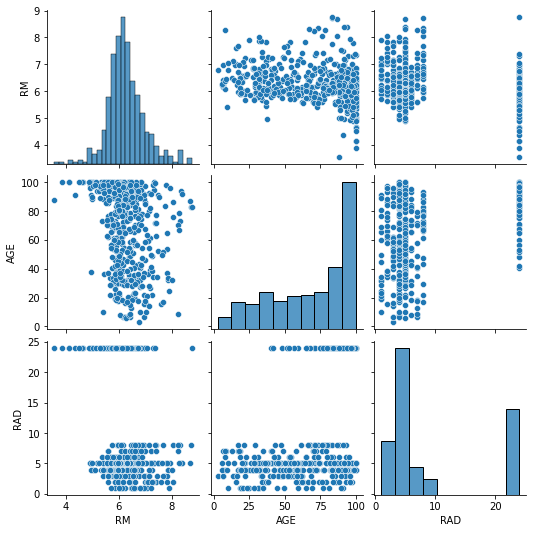

In [117]:
import seaborn as sns

cols = ["RM", "AGE", "RAD"]
sns.pairplot(X[cols])
plt.show()

각 속성의 통계량을 살펴보자.
데이터 개수는 506개로 서로 일치한다.
최소 값에 음수 값이 있는지, 평균 및 표준편차가 서로 많이 차이가 나는지 살펴본다. 

In [118]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 훈련데이터 분리

X,Y 데이터를 훈련용, 테스트용으로 분할한다.

버전에 따라 sklearn v0.18 이전에는 ```train_test_split```은 ```cross_validation```에 있었는데 그 후 변경되었다.
```python
from sklearn.cross_validation import train_test_split
```

In [121]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [122]:
Y_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((303, 1), (303, 1), (203, 13), (203, 1))

### 모델링

In [124]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [134]:
lm.coef_

array([[-1.03747356e-01,  5.58589924e-02,  5.88240770e-02,
         2.50523544e+00, -1.90284888e+01,  3.25353601e+00,
        -3.22150522e-03, -1.57603462e+00,  2.58716068e-01,
        -1.14681299e-02, -1.10777478e+00,  5.50051783e-03,
        -5.59569992e-01]])

In [137]:
lm.intercept_

array([45.48141959])

### 예측

In [125]:
Y_pred = lm.predict(X_test)

In [126]:
Y_pred.shape

(203, 1)

In [127]:
Y_pred.view()[:5]

array([[24.58155243],
       [24.51629253],
       [29.71379915],
       [12.51132696],
       [21.34965428]])

테스트 데이터에 대해 예측된 값과 실제를 비교해보자.
다중회귀분석이므로 2차원으로 그래프를 작성하는 것은 불가능하다.
예측값은 선형회귀선이므로 대각선을 가로지르는 선이 되고, 분포가 흩어져 있는만큼 오류가 된다.

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

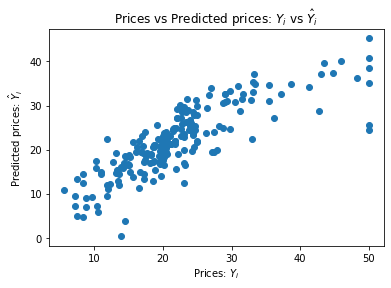

In [128]:
#plt.plot(Y_test,Y_pred, 'b+')
plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### 오류

In [129]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

25.790362150702443


### numpy로 listsq

전체에 대해서 회귀분석을 해보자.

??상수를 넣고 하면

In [140]:
import numpy as np
xarr=np.array(X)
yarr=np.array(Y)

In [141]:
np.linalg.lstsq(xarr, yarr, rcond=None)

(array([[-9.28965170e-02],
        [ 4.87149552e-02],
        [-4.05997958e-03],
        [ 2.85399882e+00],
        [-2.86843637e+00],
        [ 5.92814778e+00],
        [-7.26933458e-03],
        [-9.68514157e-01],
        [ 1.71151128e-01],
        [-9.39621540e-03],
        [-3.92190926e-01],
        [ 1.49056102e-02],
        [-4.16304471e-01]]),
 array([12228.04626104]),
 13,
 array([1.25851816e+04, 3.44597406e+03, 6.45757109e+02, 4.02050461e+02,
        1.58964612e+02, 1.21502936e+02, 9.04652420e+01, 7.79311708e+01,
        6.50828345e+01, 2.46251803e+01, 1.80945451e+01, 5.51505065e+00,
        1.48096916e+00]))

### statsmodels

In [142]:
import statsmodels.api as sm
# Fit and make the predictions by the model
model = sm.OLS(Y, X).fit()

In [143]:
predictions = model.predict(X)

위 numpy.listsq의 결과와 비교해보자.

In [144]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Fri, 06 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:15:59   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn Lasso

위 ```numpy listsq```에서 만들었던 xarr, yarr데이터를 사용하자.
컬럼벡터 yarr.shape (506,1)를 **1d array**인 yarr.ravel().shape (506,)로 변경해준다.
안 그러면 Warning이 뜬다.

```ravel()``` 함수는 배열을 1d로 만들어 준다.
예를 들어, ```[[1 2 3] [4 5 6]]```를 ```[1 2 3 4 5 6]```으로 변환한다.

alphas는 L1에 적용되는 계수이다. 기본은 1이고, 0일 경우 보통의 OLS 방식과 동일하게 계산된다.

cross-validation 분할 방식을 정할 수 있는 모델이다.

In [32]:
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import KFold, cross_val_score

lasso = LassoCV(cv=3)
yhat_lasso = lasso.fit(xarr,yarr.ravel())

In [33]:
print yhat_lasso
#print "r^2 on test data : %f" % (1 - np.linalg.norm(y_test - y_pred_lasso) ** 2
#                                      / np.linalg.norm(y_test) ** 2)

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)


In [34]:
yhat_lasso.coef_

array([-0.07391859,  0.04944576, -0.        ,  0.        , -0.        ,
        1.80092396,  0.01135702, -0.81333654,  0.27206588, -0.01542027,
       -0.74314538,  0.00898036, -0.70409988])

#### Lasso

Lasso를 연습으로 실행해보자.

In [49]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
print(clf.coef_, clf.intercept_)

(array([ 0.85,  0.  ]), 0.15000000000000002)


3,3과 4,4에 대해 예측을 해보자.
위에 출력한 계수로 계산을 맞추어보면 일치한다.
예를 들어, $2.7 = 0.85 \times 3 + 0 \times 3 + 0.15$

In [51]:
print clf.predict([[3,3],[4,4]])

[ 2.7   3.55]


### sklearn Ridge

In [176]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.01)
r.fit(xarr, yarr)
print(r.score(xarr, yarr))

0.740607266987


In [179]:
r.coef_

array([[ -0.10711135,   0.04641108,   0.02037691,   2.68683789,
        -17.68106763,   3.80566015,   0.00064898,  -1.4740674 ,
          0.3053845 ,  -0.01233842,  -0.95219114,   0.00939847,
         -0.52559349]])

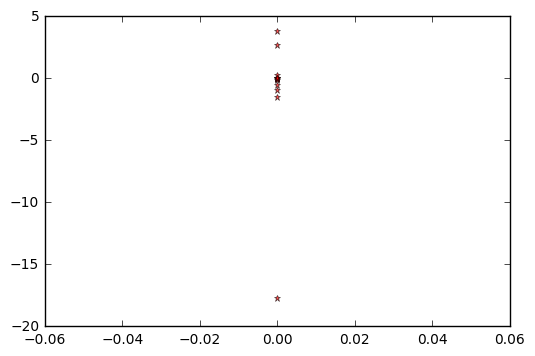

In [181]:
import matplotlib.pyplot as plt
plt.plot(r.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

### Spark

sklearn 데이터를 Pandas를 경유해 생성.

#### boston.data와 boston.target 데이터를 어떻게 합치나

두 데이터를 합치려면 shape을 알아야 한다.
(506, 13)과 (506,)를 합쳐서 (506,14)로 만들자.

In [26]:
print("boston data: ", type(boston.data), boston.data.shape)
print("boston data: ", type(boston.target), boston.target.shape)

('boston data: ', <type 'numpy.ndarray'>, (506, 13))
('boston data: ', <type 'numpy.ndarray'>, (506,))


#### (n,)과 (n,1)의 차이

잠깐 (n,)과 (n,1)은 서로 다른 행렬이라는 점에 주의한다.
```python
#(4,1) 4 x 1 2차원 array
[[1],
 [2],
 [3],
 [4]]
#(4,) 길이 4인 array
[1,2,3,4]
```

이 경우 ```column_stack()``` 함수로 두 행렬을 합칠 수 있다.
이 때 두 행렬을 괄호로 묶어주어야 한다.

In [27]:
v1=np.array([[1],[2],[3],[4]])
print(v1.shape)
v2=np.array([1,2,3,4])
print(v2.shape)

(4, 1)
(4,)


In [28]:
v3=[[11,22],[33,44],[55,66],[77,88]]
np.column_stack((v3,v2))

array([[11, 22,  1],
       [33, 44,  2],
       [55, 66,  3],
       [77, 88,  4]])

#### boston.data와 boston.target 데이터를 합치기

컬럼명도 합쳐보자.

In [29]:
import numpy as np

XY=np.column_stack((boston.data, boston.target))

In [30]:
np.append(boston.feature_names,"MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], 
      dtype='|S7')

numpy에서 데이터를 읽으면 data type을 재정의해주어야 한다. 따라서 Pandas를 경유해서 Spark DataFrame으로 읽어온다.

In [31]:
import pandas as pd

#X=pd.DataFrame(boston.data, columns=boston.feature_names)
#Y=pd.DataFrame(boston.target, columns=["MEDV"])
Z=pd.DataFrame(XY, columns=np.append(boston.feature_names,"MEDV"))

In [32]:
Z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [145]:
Z.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 

In [33]:
from pyspark.sql.types import FloatType

bos=spark.createDataFrame(Z)

In [34]:
bos.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [35]:
bos.head()

Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1.0, TAX=296.0, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)

 'MEDV'는 제외하고 features를 만든다.

In [36]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
bosFeatures = vectorAssembler.transform(bos)
#vhouse_df = vhouse_df.select(['features', 'MV'])
bosFeatures.show(10)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|            features|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87| 0.0|0.5

In [16]:
bosFeatures.dtypes

[('CRIM', 'double'),
 ('ZN', 'double'),
 ('INDUS', 'double'),
 ('CHAS', 'double'),
 ('NOX', 'double'),
 ('RM', 'double'),
 ('AGE', 'double'),
 ('DIS', 'double'),
 ('RAD', 'double'),
 ('TAX', 'double'),
 ('PTRATIO', 'double'),
 ('B', 'double'),
 ('LSTAT', 'double'),
 ('MEDV', 'double'),
 ('features', 'vector')]

In [37]:
bosFeatures.describe()

DataFrame[summary: string, CRIM: string, ZN: string, INDUS: string, CHAS: string, NOX: string, RM: string, AGE: string, DIS: string, RAD: string, TAX: string, PTRATIO: string, B: string, LSTAT: string, MEDV: string]

In [38]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(bosFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.033105731387,0.00928315690178,0.0,2.24678232414,-7.2191724694,4.34760874657,0.0,-0.602323084122,0.0,0.0,-0.822234533043,0.00811987742042,-0.503757321707]
Intercept: 20.0107307055


In [48]:
_Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 문제: statsmodel, pyspark로 당뇨의 회귀분석 및 평가

데이터는 442 건이고, 년령, 성별, BMI (Body Mass Index), 혈압, 혈청검사 6가지 측정치를 포함하여 총 10개의 값을 가지고 있다.
데이터 원본은 https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

```python
AGE	SEX	BMI	BP	S1	S2	S3	S4	S5	S6	Y
59	2	32.1	101	157	93.2	38	4	4.8598	87	151
48	1	21.6	87	183	103.2	70	3	3.8918	69	75
72	2	30.5	93	156	93.6	41	4	4.6728	85	141
24	1	25.3	84	198	131.4	40	5	4.8903	89	206
50	1	23	101	192	125.4	52	4	4.2905	80	135
```

**sklearn**에서 ```sklearn.datasets.load_diabetes()``` 함수로 읽은 데이터는 정규화되어 있다.
정규화하지 않은 원본 데이터는 https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html 에서 찾을 수 있다.
이 데이터를 읽기 위해 **```requests.get(url)```** 함수를 사용하면 탭으로 분리되어 있어 올바르게 읽히지 않는다.
**Pandas**도 url에서 직접 읽을 수 있는 기능이 있다.

* header=None으로 설정하면, 첫행을 자동으로 컬럼명으로 사용하게 된다.
* header=0으로 설정하면, 컬럼명을 삭제하고 names=[]로 설정한 이름을 사용하게 된다.

In [15]:
import pandas as pd

diabetes = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", 
           sep='\t',
           header=0,
        names=(["AGE", "SEX", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6", "Y"])
    )

In [17]:
diabetes.count()

AGE    442
SEX    442
BMI    442
BP     442
S1     442
S2     442
S3     442
S4     442
S5     442
S6     442
Y      442
dtype: int64

In [18]:
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### statsmodels

statsmodels 버전 0.5.0부터 R 스타일의 수식 표현이 가능하다. 내부적으로 statsmodels은 patsy 를 사용하여 모델링을 한다.

#### patsy

In [20]:
from patsy import dmatrices

y, X = dmatrices('Y ~ BMI', diabetes)

In [23]:
import statsmodels.formula.api as smf

results = smf.ols('Y ~ BMI', diabetes).fit()

In [24]:
results.rsquared

0.3439237602253803

In [25]:
results = smf.ols('Y ~ AGE + C(SEX) + BMI + BP + S1 + S2+ S3 + S4 + S5 + S6', diabetes).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           3.83e-62
Time:                        11:55:27   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -357.4268     67.058     -5.330      0.000    -489.228    -225.625
C(SEX)[T.2]   -22.8596      5.836     -3.917      0.000     -34.330     -11.389
AGE            -0.0364      0.217     -0.168      0.867      -0.463       0.390
BMI             5.6030      0.717      7.813      0.000       4.194       7.012
BP              1.1168      0.225      4.958      0.000       0.674       1.560
S1             -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2              0.7465      0.531      1.406      0.160      -0.297       1.790
S3              0.3720      0.782      0.475      0.635      -1.166       1.910
S4              6.5338      5.959      1.097      0.273      -5.178      18.245
S5             68.4831     15.670      4.370      0.000      37.685      99.282
S6              0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
import statsmodels.formula.api as smf

#results = smf.ols('Y ~ BMI', diabetes).fit()
results = smf.ols('Y ~ C(SEX) + BMI + BP + S5', diabetes).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     103.6
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           5.42e-62
Time:                        11:56:05   Log-Likelihood:                -2399.8
No. Observations:                 442   AIC:                             4810.
Df Residuals:                     437   BIC:                             4830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -341.8854     25.908    -13.196      0.000    -392.804    -290.966
C(SEX)[T.2]   -13.0360      5.462     -2.387      0.017     -23.772      -2.300
BMI             6.4484      0.694      9.295      0.000       5.085       7.812
BP              1.0087      0.220      4.582      0.000       0.576       1.441
S5             50.5399      5.873      8.606      0.000      38.997      62.083
==============================================================================
Omnibus:                        5.261   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.282
Skew:                           0.145   Prob(JB):                        0.118
Kurtosis:                       2.614   Cond. No.                         985.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**```statsmodels.formula.api```** vs **```statsmodels.api```**

```statsmodels.formula.api```는 절편을 구하기 위해 상수를 자동으로 추가하고 ```statsmodels.api```는 그렇지 않고 넣어주어야만 한다.  ```add_constant()```함수를 사용하여 추가할 수 있다.

또한 ```statsmodels.formula.api``` R스타일 모델링 'y ~ x1 + x2'를 지원한다.


버전 0.5.0 이후, statsmodels은 R 스타일 모델링을 지원한다. 이 때 patsy 라이브러리를 사용하게 되고, 모델에서 데이터를 생성하게 된다.

인자는 2개, formula와 dataframe을 인자로 넣어준다.
이떄 dataframe의 컬럼명을 사용, 

### spark

In [29]:
import os
os.environ["PYSPARK_PYTHON"]=os.path.join('/usr','bin','python3')
os.environ["PYSPARK_DRIVER_PYTHON"]=os.path.join('/usr','bin','python3')

In [30]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [31]:
diabetesS=spark.createDataFrame(diabetes)

In [32]:
diabetesS.show()

+---+---+----+-----+---+-----+----+----+------+---+---+
|AGE|SEX| BMI|   BP| S1|   S2|  S3|  S4|    S5| S6|  Y|
+---+---+----+-----+---+-----+----+----+------+---+---+
| 59|  2|32.1|101.0|157| 93.2|38.0| 4.0|4.8598| 87|151|
| 48|  1|21.6| 87.0|183|103.2|70.0| 3.0|3.8918| 69| 75|
| 72|  2|30.5| 93.0|156| 93.6|41.0| 4.0|4.6728| 85|141|
| 24|  1|25.3| 84.0|198|131.4|40.0| 5.0|4.8903| 89|206|
| 50|  1|23.0|101.0|192|125.4|52.0| 4.0|4.2905| 80|135|
| 23|  1|22.6| 89.0|139| 64.8|61.0| 2.0|4.1897| 68| 97|
| 36|  2|22.0| 90.0|160| 99.6|50.0| 3.0|3.9512| 82|138|
| 66|  2|26.2|114.0|255|185.0|56.0|4.55|4.2485| 92| 63|
| 60|  2|32.1| 83.0|179|119.4|42.0| 4.0|4.4773| 94|110|
| 29|  1|30.0| 85.0|180| 93.4|43.0| 4.0|5.3845| 88|310|
| 22|  1|18.6| 97.0|114| 57.6|46.0| 2.0|3.9512| 83|101|
| 56|  2|28.0| 85.0|184|144.8|32.0| 6.0|3.5835| 77| 69|
| 53|  1|23.7| 92.0|186|109.2|62.0| 3.0|4.3041| 81|179|
| 50|  2|26.2| 97.0|186|105.4|49.0| 4.0|5.0626| 88|185|
| 61|  1|24.0| 91.0|202|115.4|72.0| 3.0|4.2905| 

In [35]:
diabetesS.select("AGE", "BMI", "BP", "Y").describe().show()

+-------+------------------+-----------------+------------------+------------------+
|summary|               AGE|              BMI|                BP|                 Y|
+-------+------------------+-----------------+------------------+------------------+
|  count|               442|              442|               442|               442|
|   mean| 48.51809954751131|26.37579185520364| 94.64701357466065|152.13348416289594|
| stddev|13.109027822041089|4.418121560615775|13.831283419782995|  77.0930045329911|
|    min|                19|             18.0|              62.0|                25|
|    max|                79|             42.2|             133.0|               346|
+-------+------------------+-----------------+------------------+------------------+



### 성별 dummy

In [74]:
from pyspark.sql.functions import when

diabetesS=diabetesS.withColumn("Male", when(diabetesS['SEX']=='1', 1).otherwise(0))
diabetesS=diabetesS.withColumn("Female", when(diabetesS['SEX']=='2', 1).otherwise(0))

In [75]:
diabetesS.show()

+---+---+----+-----+---+-----+----+----+------+---+---+----+------+
|AGE|SEX| BMI|   BP| S1|   S2|  S3|  S4|    S5| S6|  Y|Male|Female|
+---+---+----+-----+---+-----+----+----+------+---+---+----+------+
| 59|  2|32.1|101.0|157| 93.2|38.0| 4.0|4.8598| 87|151|   0|     1|
| 48|  1|21.6| 87.0|183|103.2|70.0| 3.0|3.8918| 69| 75|   1|     0|
| 72|  2|30.5| 93.0|156| 93.6|41.0| 4.0|4.6728| 85|141|   0|     1|
| 24|  1|25.3| 84.0|198|131.4|40.0| 5.0|4.8903| 89|206|   1|     0|
| 50|  1|23.0|101.0|192|125.4|52.0| 4.0|4.2905| 80|135|   1|     0|
| 23|  1|22.6| 89.0|139| 64.8|61.0| 2.0|4.1897| 68| 97|   1|     0|
| 36|  2|22.0| 90.0|160| 99.6|50.0| 3.0|3.9512| 82|138|   0|     1|
| 66|  2|26.2|114.0|255|185.0|56.0|4.55|4.2485| 92| 63|   0|     1|
| 60|  2|32.1| 83.0|179|119.4|42.0| 4.0|4.4773| 94|110|   0|     1|
| 29|  1|30.0| 85.0|180| 93.4|43.0| 4.0|5.3845| 88|310|   1|     0|
| 22|  1|18.6| 97.0|114| 57.6|46.0| 2.0|3.9512| 83|101|   1|     0|
| 56|  2|28.0| 85.0|184|144.8|32.0| 6.0|3.5835| 

### onehot encoding

In [69]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol="SEX", outputCol="SEXIndex")
model = stringIndexer.fit(diabetesS)
_diabetesS = model.transform(diabetesS)

In [70]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(inputCol="SEXIndex", outputCol="SEXVec")
encoded = encoder.fit(_diabetesS)
_diabetesS = encoded.transform(_diabetesS)

In [71]:
_diabetesS.show()

+---+---+----+-----+---+-----+----+----+------+---+---+--------+-------------+
|AGE|SEX| BMI|   BP| S1|   S2|  S3|  S4|    S5| S6|  Y|SEXIndex|       SEXVec|
+---+---+----+-----+---+-----+----+----+------+---+---+--------+-------------+
| 59|  2|32.1|101.0|157| 93.2|38.0| 4.0|4.8598| 87|151|     1.0|    (1,[],[])|
| 48|  1|21.6| 87.0|183|103.2|70.0| 3.0|3.8918| 69| 75|     0.0|(1,[0],[1.0])|
| 72|  2|30.5| 93.0|156| 93.6|41.0| 4.0|4.6728| 85|141|     1.0|    (1,[],[])|
| 24|  1|25.3| 84.0|198|131.4|40.0| 5.0|4.8903| 89|206|     0.0|(1,[0],[1.0])|
| 50|  1|23.0|101.0|192|125.4|52.0| 4.0|4.2905| 80|135|     0.0|(1,[0],[1.0])|
| 23|  1|22.6| 89.0|139| 64.8|61.0| 2.0|4.1897| 68| 97|     0.0|(1,[0],[1.0])|
| 36|  2|22.0| 90.0|160| 99.6|50.0| 3.0|3.9512| 82|138|     1.0|    (1,[],[])|
| 66|  2|26.2|114.0|255|185.0|56.0|4.55|4.2485| 92| 63|     1.0|    (1,[],[])|
| 60|  2|32.1| 83.0|179|119.4|42.0| 4.0|4.4773| 94|110|     1.0|    (1,[],[])|
| 29|  1|30.0| 85.0|180| 93.4|43.0| 4.0|5.3845| 88|3

### features



In [ ]:
SEX를 Male, Female로 변환했을 경우

In [76]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler1 = VectorAssembler(inputCols = ['AGE','Male','Female','BMI','BP','S1','S2','S3', 'S4','S5','S6'],
                                               outputCol = 'features')
diaFeatures = vectorAssembler1.transform(diabetesS)
#vhouse_df = vhouse_df.select(['features', 'MV'])

In [ ]:
SEX를 SEXVec으로 변환했을 경우

In [78]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler2 = VectorAssembler(inputCols = ['AGE','SEXVec','BMI','BP','S1','S2','S3', 'S4','S5','S6'],
                                               outputCol = 'features')
diaFeatures = vectorAssembler2.transform(_diabetesS)
#vhouse_df = vhouse_df.select(['features', 'MV'])

In [79]:
diaFeatures.show(10)

+---+---+----+-----+---+-----+----+----+------+---+---+--------+-------------+--------------------+
|AGE|SEX| BMI|   BP| S1|   S2|  S3|  S4|    S5| S6|  Y|SEXIndex|       SEXVec|            features|
+---+---+----+-----+---+-----+----+----+------+---+---+--------+-------------+--------------------+
| 59|  2|32.1|101.0|157| 93.2|38.0| 4.0|4.8598| 87|151|     1.0|    (1,[],[])|[59.0,0.0,32.1,10...|
| 48|  1|21.6| 87.0|183|103.2|70.0| 3.0|3.8918| 69| 75|     0.0|(1,[0],[1.0])|[48.0,1.0,21.6,87...|
| 72|  2|30.5| 93.0|156| 93.6|41.0| 4.0|4.6728| 85|141|     1.0|    (1,[],[])|[72.0,0.0,30.5,93...|
| 24|  1|25.3| 84.0|198|131.4|40.0| 5.0|4.8903| 89|206|     0.0|(1,[0],[1.0])|[24.0,1.0,25.3,84...|
| 50|  1|23.0|101.0|192|125.4|52.0| 4.0|4.2905| 80|135|     0.0|(1,[0],[1.0])|[50.0,1.0,23.0,10...|
| 23|  1|22.6| 89.0|139| 64.8|61.0| 2.0|4.1897| 68| 97|     0.0|(1,[0],[1.0])|[23.0,1.0,22.6,89...|
| 36|  2|22.0| 90.0|160| 99.6|50.0| 3.0|3.9512| 82|138|     1.0|    (1,[],[])|[36.0,0.0,22.0,90...|


In [ ]:
SEX를 Male, Female로 변환했을 경우

In [18]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Y', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(diaFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.00225926193484,10.8793629065,-10.8793629065,5.57040962172,1.0882760531,-0.199072524409,0.0,-0.723324920393,2.6026480564,46.5962086882,0.268064392952]
Intercept: -276.035447316


In [ ]:
SEX를 SEXVec으로 변환했을 경우

In [80]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Y', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(diaFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.004664337654898424,21.706269190230287,5.640069773859966,1.0996355967788476,-0.1020574543064724,-0.1309379585202677,-0.802037001228756,2.9601515839498975,43.67589803489804,0.2704956959503308]
Intercept: -277.1205050720593


### sklearn에서 제공하는 데이터를 읽어보자.

In [3]:
from sklearn import datasets

diabetes2 = datasets.load_diabetes()

In [6]:
diabetes2.keys()

['data', 'target']

데이터는 442 건이고, 속성은 AGE, SEX, BMI (Body Mass Index), BP (Average Blood Pressure), 혈청검사 측정치 6 종류 (Blood Serum Measurements) S1, S2, S3, S4, S5, S6 총 10개이다.

In [4]:
print(type(diabetes2.data), diabetes2.data.shape)

(<type 'numpy.ndarray'>, (442, 10))


### x,y

단순 회귀분석을 하기위해, 3번째 데이터만 추출해서 독립변수 x로 한다.
이 경우, 데이터를 1차원 (442, ) -> 2차원 (442,1)으로 변환하기 위해 ```np.newaxis```를 넣어준다.

In [1]:
import numpy as np
x = diabetes2.data[:, np.newaxis, 2]

NameError: name 'diabetes2' is not defined

몇 개만 출력해보자.

In [9]:
x[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [10]:
diabetes.target[:5]

array([ 151.,   75.,  141.,  206.,  135.])

### 회귀모델

훈련, 테스트로 나누어 보자.

In [11]:
xtrain = x[:-20]
xtest = x[-20:]

# Split the targets into training/testing sets
ytrain = diabetes.target[:-20]
ytest = diabetes.target[-20:]

In [13]:
ytest

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,
         66.,  173.,   72.,   49.,   64.,   48.,  178.,  104.,  132.,
        220.,   57.])

In [16]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(xtrain, ytrain)

# Make predictions using the testing set
ypred = regr.predict(xtest)

# The coefficients
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([ 970.16723129]))


In [17]:
regr.intercept_

0.0

In [18]:
regr.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': False}

In [20]:
x, residuals, rank, s = np.linalg.lstsq(xtrain, ytrain)

In [24]:
print "weights:",x, "residuals:",residuals, "rank:",rank,"signular value of x:",s

weights: [ 970.16723129] residuals: [ 11536167.2204842] rank: 1 signular value of x: [ 0.97763907]


In [19]:
x, residuals, rank, s = np.linalg.lstsq(xtrain, ytrain)

(array([ 970.16723129]), array([ 11536167.2204842]), 1, array([ 0.97763907]))

In [27]:
r2 = 1 - residuals / (ytrain.size * ytrain.var())
print r2

[-3.59553782]


In [30]:
ytrain.mean()

153.36255924170615

In [32]:
1 - residuals / sum((ytrain - ytrain.mean())**2) 

array([-3.59553782])